# tmp — sep24

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from analysis.chosen import *
from figures.analysis import *
from figures.imgs import plot_weights

device_idx = 0
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:0  ———  host: mach

In [23]:
%%time

trn, vld, tst = make_dataset('CelebA', grey=True)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CelebA/processed_grey

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CelebA/processed_grey

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CelebA/processed_grey

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CelebA/processed_grey

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/CelebA/processed_grey

[PROGRESS] 'y_tst.npy' saved at
/home/hadi/Datasets/CelebA/processed_grey

CPU times: user 5h 27min 14s, sys: 11min 29s, total: 5h 38min 43s
Wall time: 5min 38s


In [26]:
x = tonp(vld.tensors[0])
x = (1 + x) / 2

<Axes: ylabel='Count'>

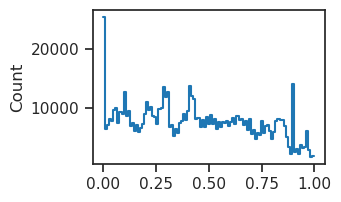

In [27]:
histplot(tonp(x[:20].ravel()))

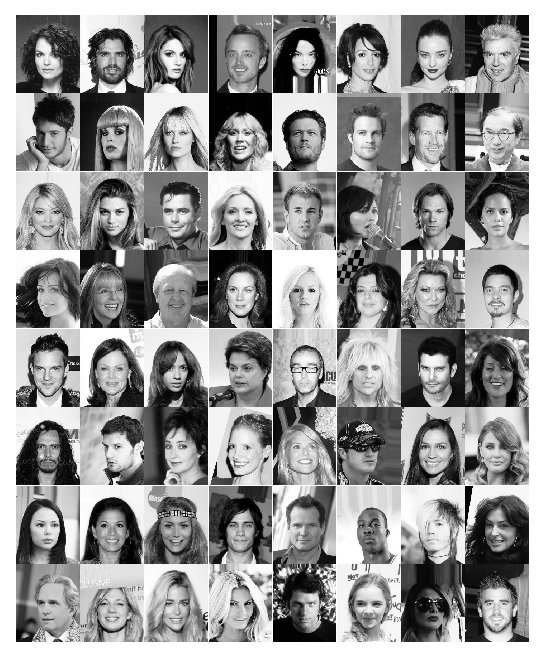

In [28]:
_ = plot_weights(x[:64], nrows=8)

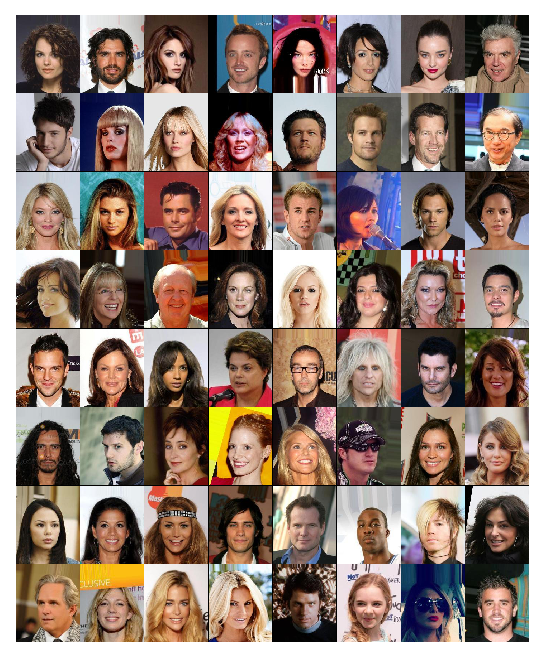

In [22]:
_ = plot_weights(x[:64], nrows=8)

In [3]:
import torchvision

In [5]:
root = add_home('Datasets/CelebA')

# torchvision.datasets.CelebA(root=root, split='train', target_type='attr', download=True)
# torchvision.datasets.CelebA(root=root, split='valid', target_type='attr', download=True)
# torchvision.datasets.CelebA(root=root, split='test', target_type='attr', download=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Dataset CelebA
    Number of datapoints: 19962
    Root location: /home/hadi/Datasets/CelebA
    Target type: ['attr']
    Split: test

In [6]:
ds = torchvision.datasets.CelebA(root=root, split='test', target_type='attr')

Files already downloaded and verified


In [43]:
key = 'MNIST_<jacob|mlp>_(64,24.0)'

kws_load = selected_models_28x28(device)[key]
tr, meta = load_model(**kws_load)
meta['checkpoint']

400

In [5]:
from analysis.ood import ood_analysis

In [6]:
accuracy, results = ood_analysis(tr, 'Omniglot', t_recon=1000, verbose=True)

100%|█████████████████████████████████| 66/66 [04:02<00:00,  3.67s/it]


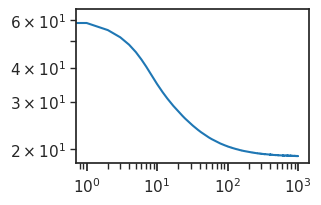

In [9]:
plt.loglog(results['mse']);

In [10]:
results['mse'][-1]

18.90797

In [28]:
inds_when_tgt_omni = np.load(pjoin(tmp_dir, 'inds.npy'))

dekel_dir = '/home/hadi/Dropbox/git/jb-vae/tmp/dekel_data/rot_full'
f = 'SAVAE_from-mnist-to-omniglot_iter20_full.npz'

In [29]:
load = dict(np.load(
    pjoin(dekel_dir, f),
    allow_pickle=True,
))

In [30]:
list(load)

['recons_trn',
 'recons_val',
 'posteriors_trn',
 'posteriors_val',
 'model_n_params']

In [31]:
recon = load['recons_val']
recon /= 255

recon = recon[inds_when_tgt_omni]

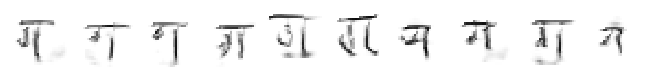

In [32]:
plot_row_or_col(recon[110:120], True, True);

In [36]:
vld = make_dataset('Omniglot')[1]
vld = tonp(vld.tensors[0])

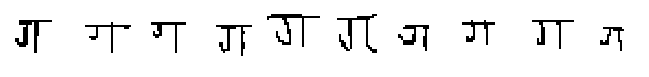

In [37]:
plot_row_or_col(vld[110:120], True, True);

In [42]:
mse_kim = (recon - vld) ** 2
mse_kim = mse_kim.sum(axis=(1, 2, 3))

In [44]:
key = 'MNIST_<jacob|mlp>_(64,24.0)'

kws_load = selected_models_28x28(device)[key]
tr, meta = load_model(**kws_load)
meta['checkpoint']

400

In [48]:
from base.dataset import make_dataloader

vld = make_dataloader('Omniglot', device, batch_size=1500)[1]

In [55]:
results = tr.analysis(vld, seq_total=1000, avg_samples=False)

100%|█████████████████████████████████| 66/66 [03:27<00:00,  3.15s/it]


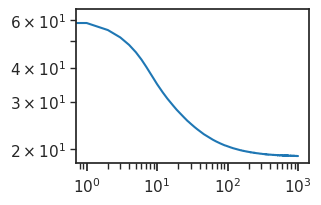

In [59]:
plt.loglog(results['mse'].mean(0));

In [60]:
results['mse'][:, -1]

array([11.574373 , 11.354868 , 14.9402685, ..., 26.541811 , 54.3788   ,
       47.173637 ], dtype=float32)

______________________________________________________________________________________________________________

seed = 0, percent improvement = 36.5    ---    us: 19.1, them: 30.1

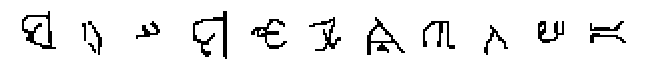

______________________________________________________________________________________________________________

seed = 1, percent improvement = 44.9    ---    us: 16.6, them: 30.1

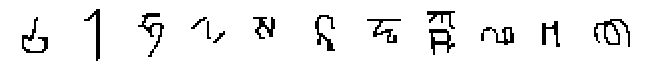

______________________________________________________________________________________________________________

seed = 2, percent improvement = 40.8    ---    us: 18.8, them: 31.8

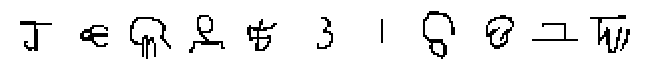

______________________________________________________________________________________________________________

seed = 3, percent improvement = 44.4    ---    us: 15.2, them: 27.3

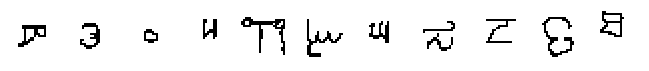

______________________________________________________________________________________________________________

seed = 4, percent improvement = 43.1    ---    us: 16.6, them: 29.2

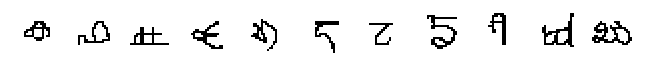

______________________________________________________________________________________________________________

seed = 5, percent improvement = 41.4    ---    us: 15.8, them: 26.9

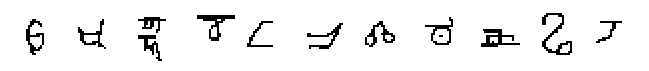

______________________________________________________________________________________________________________

seed = 6, percent improvement = 30.7    ---    us: 23.3, them: 33.7

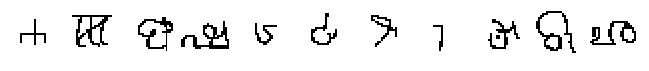

______________________________________________________________________________________________________________

seed = 7, percent improvement = 42.3    ---    us: 17.9, them: 31.1

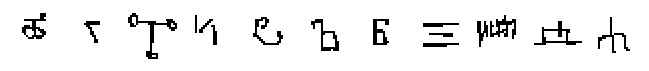

______________________________________________________________________________________________________________

seed = 8, percent improvement = 36.2    ---    us: 19.3, them: 30.3

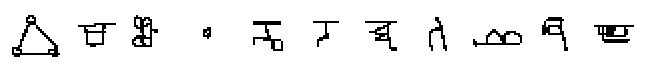

______________________________________________________________________________________________________________

seed = 9, percent improvement = 40.8    ---    us: 19.3, them: 32.6

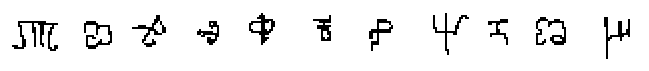

______________________________________________________________________________________________________________

seed = 10, percent improvement = 39.5    ---    us: 18.1, them: 29.9

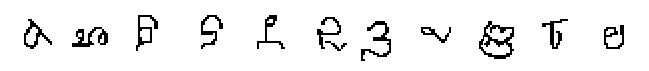

______________________________________________________________________________________________________________

seed = 11, percent improvement = 36.9    ---    us: 20.1, them: 31.9

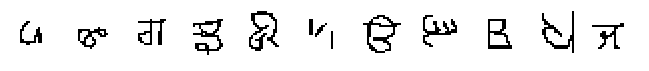

______________________________________________________________________________________________________________

seed = 12, percent improvement = 43.1    ---    us: 14.3, them: 25.1

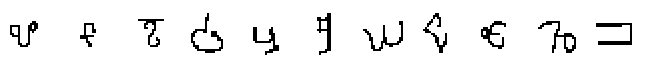

______________________________________________________________________________________________________________

seed = 13, percent improvement = 25.6    ---    us: 23.9, them: 32.1

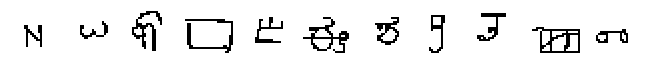

______________________________________________________________________________________________________________

seed = 14, percent improvement = 41.0    ---    us: 17.5, them: 29.7

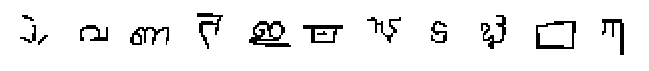

______________________________________________________________________________________________________________

seed = 15, percent improvement = 42.1    ---    us: 15.8, them: 27.4

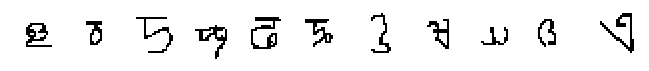

______________________________________________________________________________________________________________

seed = 16, percent improvement = 43.2    ---    us: 17.2, them: 30.3

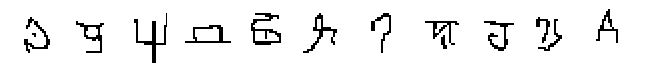

______________________________________________________________________________________________________________

seed = 17, percent improvement = 26.5    ---    us: 24.8, them: 33.7

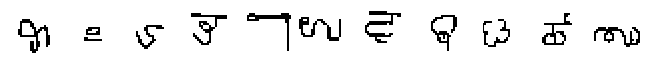

______________________________________________________________________________________________________________

seed = 18, percent improvement = 37.2    ---    us: 20.4, them: 32.5

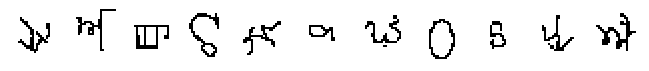

______________________________________________________________________________________________________________

seed = 19, percent improvement = 33.0    ---    us: 20.3, them: 30.3

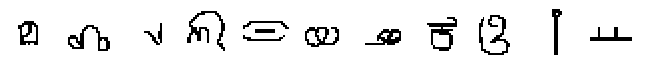

______________________________________________________________________________________________________________

seed = 20, percent improvement = 39.0    ---    us: 20.3, them: 33.3

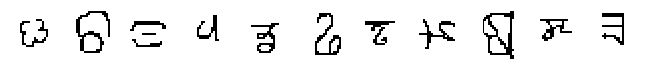

______________________________________________________________________________________________________________

seed = 21, percent improvement = 44.2    ---    us: 14.9, them: 26.6

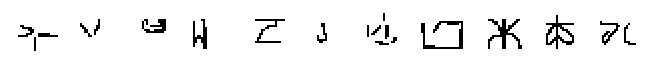

______________________________________________________________________________________________________________

seed = 22, percent improvement = 35.6    ---    us: 22.4, them: 34.8

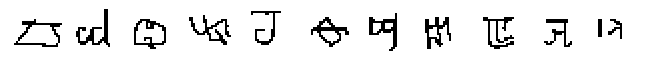

______________________________________________________________________________________________________________

seed = 23, percent improvement = 40.9    ---    us: 17.3, them: 29.2

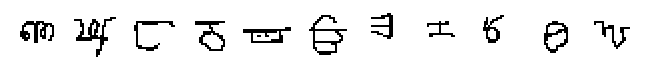

______________________________________________________________________________________________________________

seed = 24, percent improvement = 45.9    ---    us: 16.8, them: 31.1

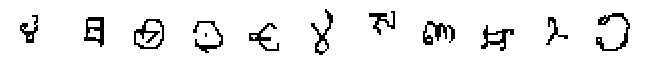

______________________________________________________________________________________________________________

seed = 25, percent improvement = 41.5    ---    us: 16.0, them: 27.3

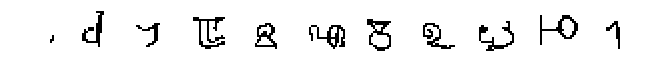

______________________________________________________________________________________________________________

seed = 26, percent improvement = 39.6    ---    us: 17.5, them: 28.9

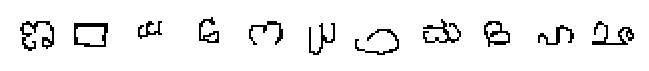

______________________________________________________________________________________________________________

seed = 27, percent improvement = 36.3    ---    us: 19.6, them: 30.8

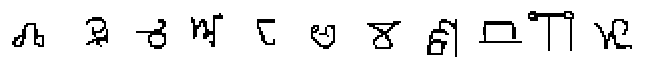

______________________________________________________________________________________________________________

seed = 28, percent improvement = 43.2    ---    us: 13.2, them: 23.2

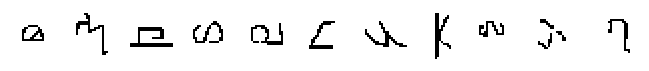

______________________________________________________________________________________________________________

seed = 29, percent improvement = 37.3    ---    us: 20.3, them: 32.3

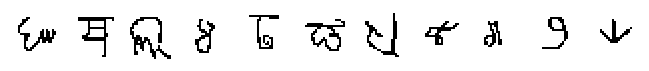

______________________________________________________________________________________________________________

seed = 30, percent improvement = 35.6    ---    us: 20.2, them: 31.3

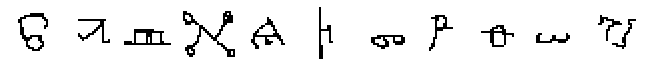

______________________________________________________________________________________________________________

seed = 31, percent improvement = 40.7    ---    us: 18.5, them: 31.2

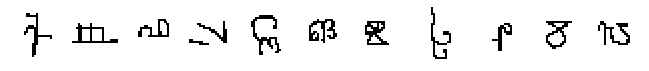

______________________________________________________________________________________________________________

seed = 32, percent improvement = 36.5    ---    us: 17.0, them: 26.7

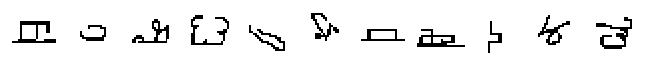

______________________________________________________________________________________________________________

seed = 33, percent improvement = 37.1    ---    us: 15.5, them: 24.6

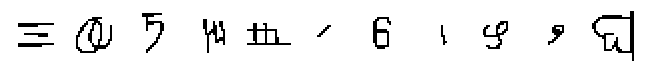

______________________________________________________________________________________________________________

seed = 34, percent improvement = 36.5    ---    us: 18.2, them: 28.7

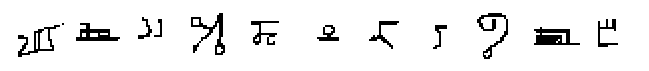

______________________________________________________________________________________________________________

seed = 35, percent improvement = 41.9    ---    us: 18.4, them: 31.6

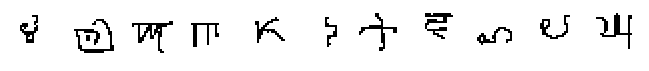

______________________________________________________________________________________________________________

seed = 36, percent improvement = 41.2    ---    us: 18.9, them: 32.2

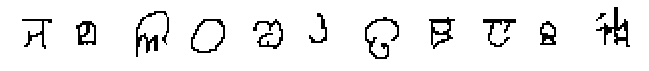

______________________________________________________________________________________________________________

seed = 37, percent improvement = 43.7    ---    us: 17.3, them: 30.7

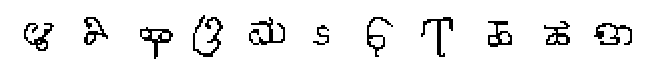

______________________________________________________________________________________________________________

seed = 38, percent improvement = 37.2    ---    us: 16.4, them: 26.2

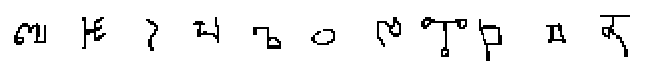

______________________________________________________________________________________________________________

seed = 39, percent improvement = 37.6    ---    us: 18.7, them: 29.9

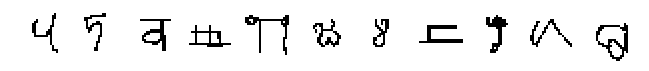

______________________________________________________________________________________________________________

seed = 40, percent improvement = 37.5    ---    us: 22.9, them: 36.6

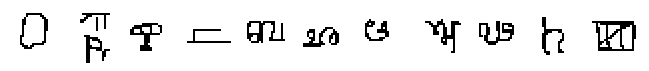

______________________________________________________________________________________________________________

seed = 41, percent improvement = 41.9    ---    us: 14.3, them: 24.7

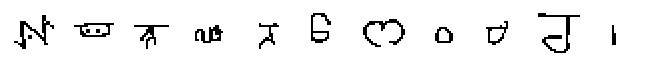

______________________________________________________________________________________________________________

seed = 42, percent improvement = 37.9    ---    us: 19.0, them: 30.7

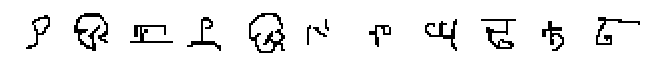

______________________________________________________________________________________________________________

seed = 43, percent improvement = 38.8    ---    us: 17.8, them: 29.1

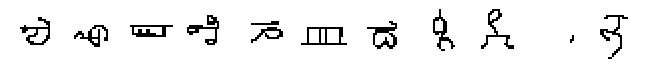

______________________________________________________________________________________________________________

seed = 44, percent improvement = 37.3    ---    us: 18.7, them: 29.8

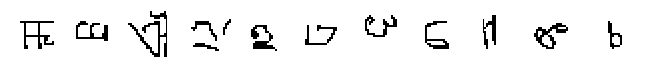

______________________________________________________________________________________________________________

seed = 45, percent improvement = 27.5    ---    us: 25.1, them: 34.6

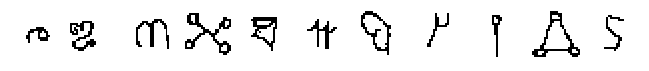

______________________________________________________________________________________________________________

seed = 46, percent improvement = 41.0    ---    us: 17.0, them: 28.9

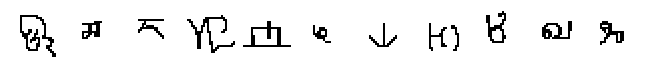

______________________________________________________________________________________________________________

seed = 47, percent improvement = 38.6    ---    us: 19.3, them: 31.4

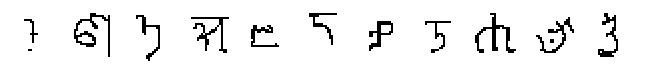

______________________________________________________________________________________________________________

seed = 48, percent improvement = 42.1    ---    us: 15.9, them: 27.5

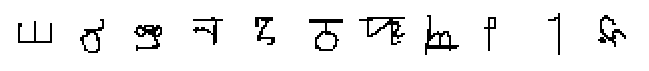

______________________________________________________________________________________________________________

seed = 49, percent improvement = 42.1    ---    us: 17.2, them: 29.7

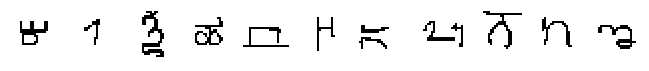

______________________________________________________________________________________________________________

seed = 50, percent improvement = 41.5    ---    us: 17.8, them: 30.4

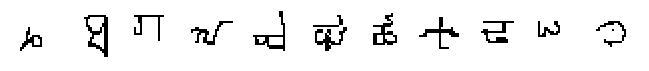

______________________________________________________________________________________________________________

seed = 51, percent improvement = 36.9    ---    us: 21.0, them: 33.3

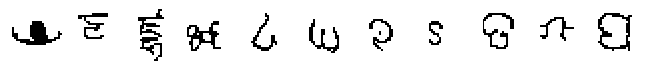

______________________________________________________________________________________________________________

seed = 52, percent improvement = 46.9    ---    us: 14.1, them: 26.6

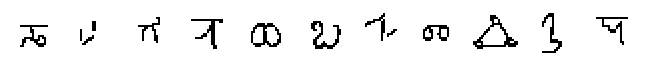

______________________________________________________________________________________________________________

seed = 53, percent improvement = 31.2    ---    us: 26.7, them: 38.8

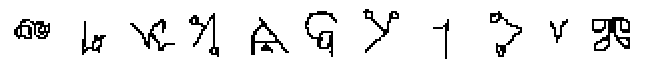

______________________________________________________________________________________________________________

seed = 54, percent improvement = 32.0    ---    us: 23.2, them: 34.1

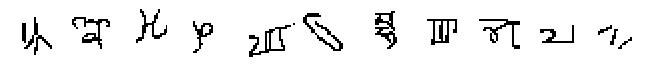

______________________________________________________________________________________________________________

seed = 55, percent improvement = 40.4    ---    us: 18.4, them: 30.9

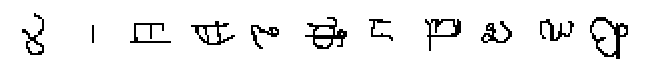

______________________________________________________________________________________________________________

seed = 56, percent improvement = 38.2    ---    us: 22.1, them: 35.7

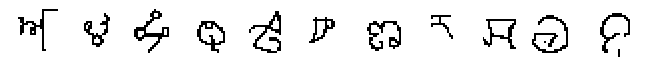

______________________________________________________________________________________________________________

seed = 57, percent improvement = 37.7    ---    us: 21.2, them: 34.0

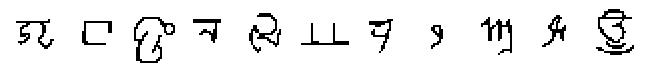

______________________________________________________________________________________________________________

seed = 58, percent improvement = 31.2    ---    us: 23.7, them: 34.5

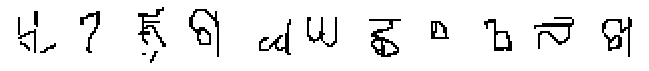

______________________________________________________________________________________________________________

seed = 59, percent improvement = 41.0    ---    us: 19.7, them: 33.5

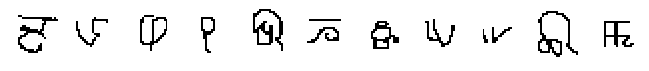

______________________________________________________________________________________________________________

seed = 60, percent improvement = 46.7    ---    us: 16.0, them: 30.0

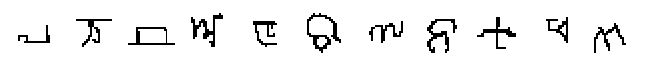

______________________________________________________________________________________________________________

seed = 61, percent improvement = 44.2    ---    us: 14.8, them: 26.6

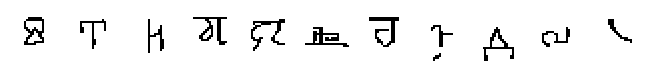

______________________________________________________________________________________________________________

seed = 62, percent improvement = 28.9    ---    us: 22.4, them: 31.5

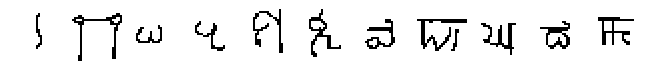

______________________________________________________________________________________________________________

seed = 63, percent improvement = 40.0    ---    us: 18.6, them: 31.0

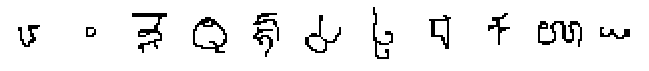

______________________________________________________________________________________________________________

seed = 64, percent improvement = 43.1    ---    us: 19.1, them: 33.6

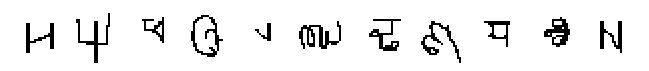

______________________________________________________________________________________________________________

seed = 65, percent improvement = 45.1    ---    us: 15.3, them: 27.9

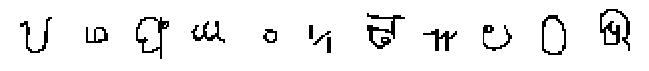

______________________________________________________________________________________________________________

seed = 66, percent improvement = 49.1    ---    us: 12.6, them: 24.8

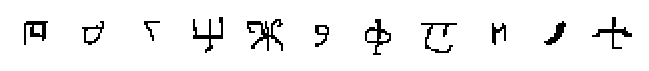

______________________________________________________________________________________________________________

seed = 67, percent improvement = 39.8    ---    us: 18.7, them: 31.0

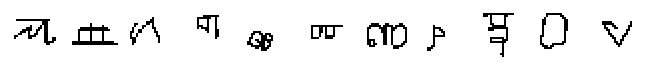

______________________________________________________________________________________________________________

seed = 68, percent improvement = 28.9    ---    us: 22.3, them: 31.4

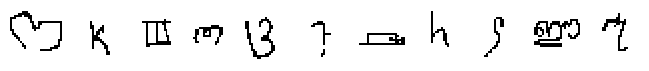

______________________________________________________________________________________________________________

seed = 69, percent improvement = 35.1    ---    us: 19.7, them: 30.3

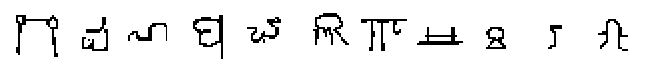

______________________________________________________________________________________________________________

seed = 70, percent improvement = 31.1    ---    us: 27.6, them: 40.1

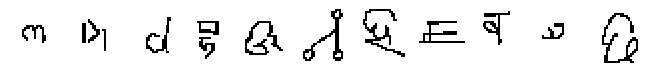

______________________________________________________________________________________________________________

seed = 71, percent improvement = 35.4    ---    us: 23.1, them: 35.8

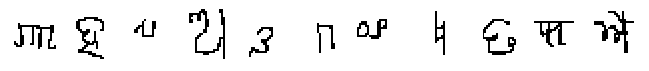

______________________________________________________________________________________________________________

seed = 72, percent improvement = 38.9    ---    us: 18.4, them: 30.2

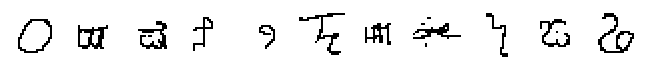

______________________________________________________________________________________________________________

seed = 73, percent improvement = 38.6    ---    us: 17.8, them: 29.0

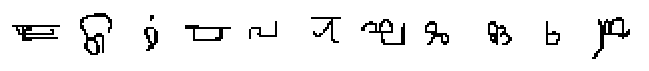

______________________________________________________________________________________________________________

seed = 74, percent improvement = 36.6    ---    us: 18.2, them: 28.7

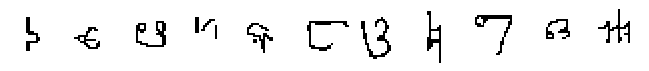

______________________________________________________________________________________________________________

seed = 75, percent improvement = 44.2    ---    us: 19.4, them: 34.8

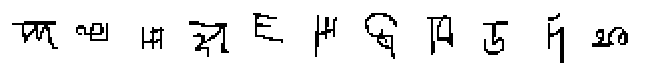

______________________________________________________________________________________________________________

seed = 76, percent improvement = 43.0    ---    us: 17.5, them: 30.7

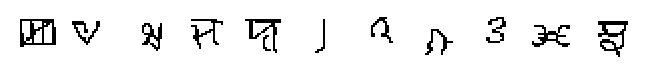

______________________________________________________________________________________________________________

seed = 77, percent improvement = 32.1    ---    us: 21.5, them: 31.7

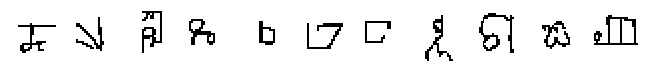

______________________________________________________________________________________________________________

seed = 78, percent improvement = 41.3    ---    us: 18.5, them: 31.6

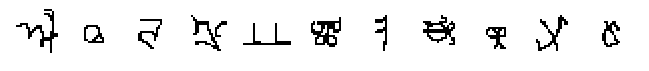

______________________________________________________________________________________________________________

seed = 79, percent improvement = 40.6    ---    us: 16.4, them: 27.5

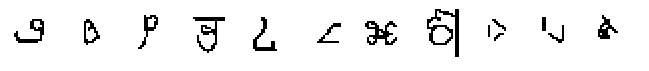

______________________________________________________________________________________________________________

seed = 80, percent improvement = 32.2    ---    us: 22.1, them: 32.6

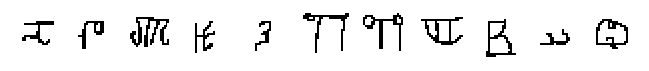

______________________________________________________________________________________________________________

seed = 81, percent improvement = 35.8    ---    us: 20.6, them: 32.2

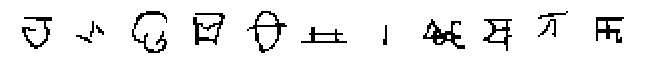

______________________________________________________________________________________________________________

seed = 82, percent improvement = 32.8    ---    us: 21.9, them: 32.6

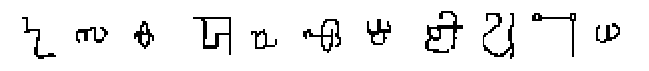

______________________________________________________________________________________________________________

seed = 83, percent improvement = 34.5    ---    us: 19.3, them: 29.5

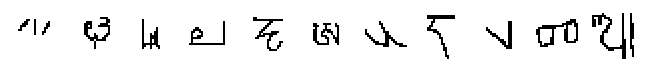

______________________________________________________________________________________________________________

seed = 84, percent improvement = 42.5    ---    us: 18.2, them: 31.7

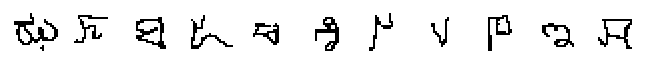

______________________________________________________________________________________________________________

seed = 85, percent improvement = 35.3    ---    us: 17.9, them: 27.7

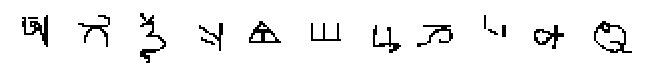

______________________________________________________________________________________________________________

seed = 86, percent improvement = 39.9    ---    us: 18.9, them: 31.5

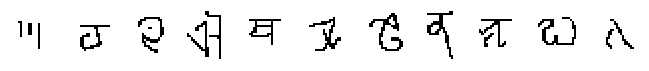

______________________________________________________________________________________________________________

seed = 87, percent improvement = 38.2    ---    us: 15.8, them: 25.5

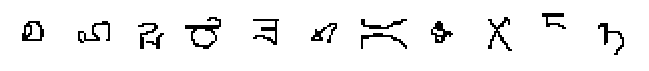

______________________________________________________________________________________________________________

seed = 88, percent improvement = 34.7    ---    us: 22.2, them: 34.1

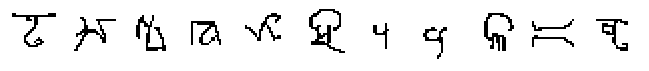

______________________________________________________________________________________________________________

seed = 89, percent improvement = 44.5    ---    us: 14.9, them: 26.9

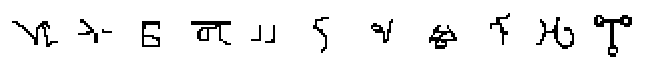

______________________________________________________________________________________________________________

seed = 90, percent improvement = 39.7    ---    us: 20.1, them: 33.3

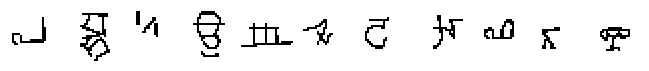

______________________________________________________________________________________________________________

seed = 91, percent improvement = 35.5    ---    us: 17.9, them: 27.7

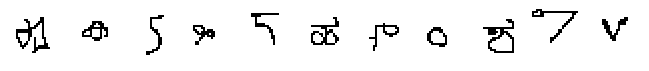

______________________________________________________________________________________________________________

seed = 92, percent improvement = 32.6    ---    us: 23.6, them: 35.0

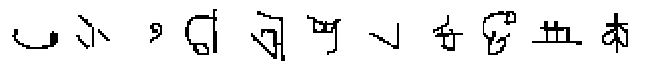

______________________________________________________________________________________________________________

seed = 93, percent improvement = 41.0    ---    us: 19.8, them: 33.5

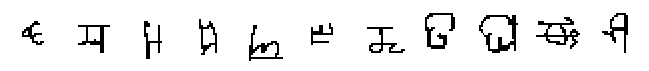

______________________________________________________________________________________________________________

seed = 94, percent improvement = 45.1    ---    us: 14.7, them: 26.7

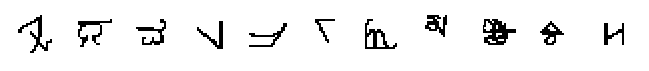

______________________________________________________________________________________________________________

seed = 95, percent improvement = 44.6    ---    us: 15.9, them: 28.7

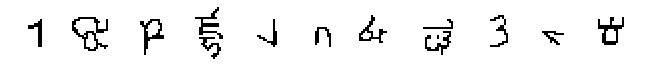

______________________________________________________________________________________________________________

seed = 96, percent improvement = 40.6    ---    us: 22.9, them: 38.6

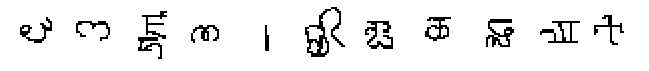

______________________________________________________________________________________________________________

seed = 97, percent improvement = 36.7    ---    us: 22.5, them: 35.5

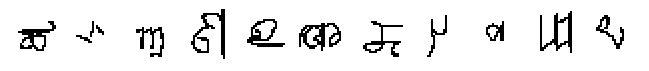

______________________________________________________________________________________________________________

seed = 98, percent improvement = 46.1    ---    us: 14.4, them: 26.8

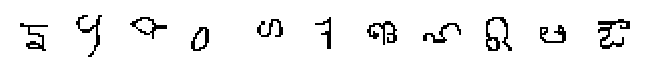

______________________________________________________________________________________________________________

seed = 99, percent improvement = 40.4    ---    us: 21.4, them: 36.0

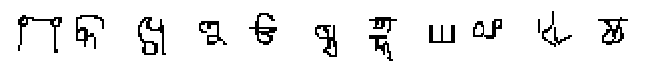

______________________________________________________________________________________________________________

seed = 100, percent improvement = 33.0    ---    us: 23.6, them: 35.2

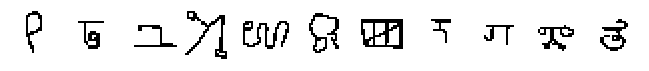

______________________________________________________________________________________________________________

seed = 101, percent improvement = 51.5    ---    us: 13.3, them: 27.4

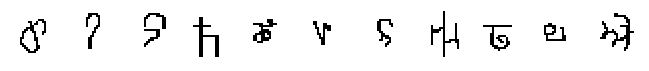

______________________________________________________________________________________________________________

seed = 102, percent improvement = 28.7    ---    us: 23.0, them: 32.3

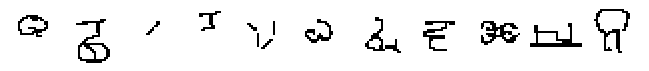

______________________________________________________________________________________________________________

seed = 103, percent improvement = 32.7    ---    us: 23.1, them: 34.4

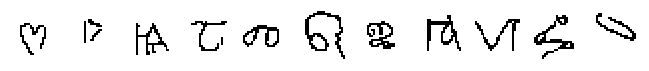

______________________________________________________________________________________________________________

seed = 104, percent improvement = 39.2    ---    us: 15.6, them: 25.7

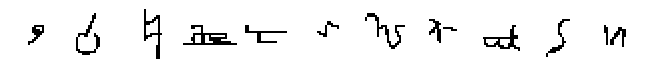

______________________________________________________________________________________________________________

seed = 105, percent improvement = 43.0    ---    us: 14.3, them: 25.1

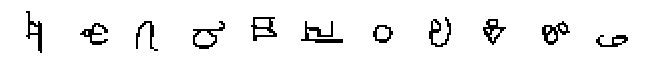

______________________________________________________________________________________________________________

seed = 106, percent improvement = 39.1    ---    us: 19.8, them: 32.5

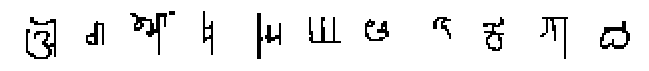

______________________________________________________________________________________________________________

seed = 107, percent improvement = 36.7    ---    us: 18.9, them: 29.8

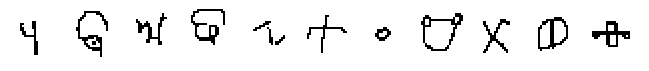

______________________________________________________________________________________________________________

seed = 108, percent improvement = 36.8    ---    us: 20.7, them: 32.8

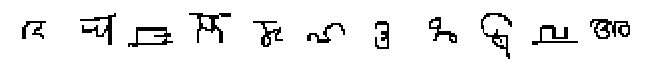

______________________________________________________________________________________________________________

seed = 109, percent improvement = 42.4    ---    us: 17.0, them: 29.5

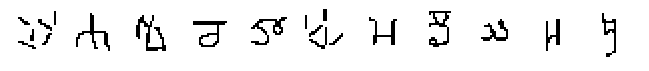

______________________________________________________________________________________________________________

seed = 110, percent improvement = 40.9    ---    us: 16.8, them: 28.5

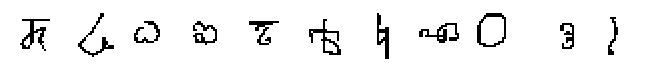

______________________________________________________________________________________________________________

seed = 111, percent improvement = 40.1    ---    us: 17.8, them: 29.6

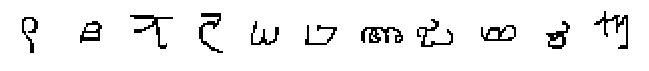

______________________________________________________________________________________________________________

seed = 112, percent improvement = 39.7    ---    us: 20.4, them: 33.9

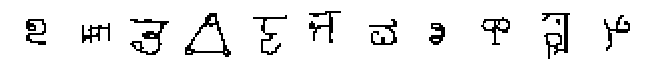

______________________________________________________________________________________________________________

seed = 113, percent improvement = 38.4    ---    us: 19.6, them: 31.9

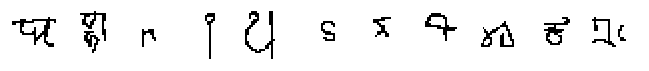

______________________________________________________________________________________________________________

seed = 114, percent improvement = 37.5    ---    us: 18.8, them: 30.1

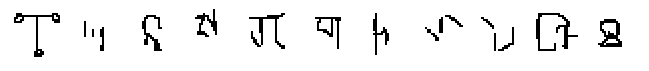

______________________________________________________________________________________________________________

seed = 115, percent improvement = 41.3    ---    us: 14.9, them: 25.4

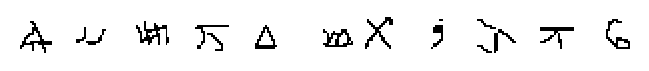

______________________________________________________________________________________________________________

seed = 116, percent improvement = 46.0    ---    us: 15.6, them: 29.0

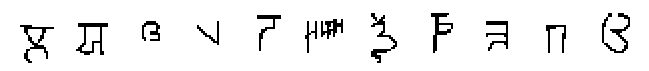

______________________________________________________________________________________________________________

seed = 117, percent improvement = 35.8    ---    us: 21.9, them: 34.1

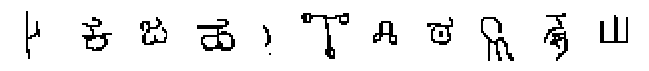

______________________________________________________________________________________________________________

seed = 118, percent improvement = 44.7    ---    us: 14.9, them: 27.0

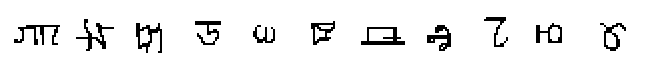

______________________________________________________________________________________________________________

seed = 119, percent improvement = 46.5    ---    us: 14.8, them: 27.6

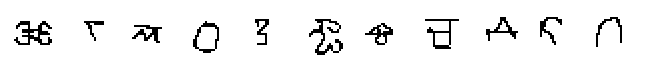

______________________________________________________________________________________________________________

seed = 120, percent improvement = 36.3    ---    us: 21.7, them: 34.0

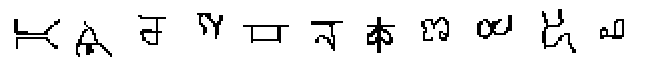

______________________________________________________________________________________________________________

seed = 121, percent improvement = 31.0    ---    us: 22.0, them: 31.9

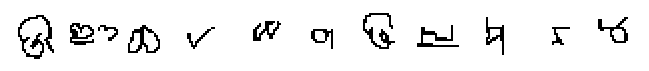

______________________________________________________________________________________________________________

seed = 122, percent improvement = 41.2    ---    us: 19.0, them: 32.4

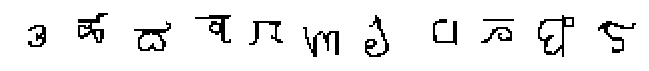

______________________________________________________________________________________________________________

seed = 123, percent improvement = 34.5    ---    us: 23.7, them: 36.1

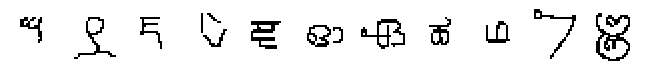

______________________________________________________________________________________________________________

seed = 124, percent improvement = 39.5    ---    us: 18.1, them: 29.9

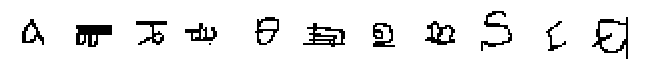

______________________________________________________________________________________________________________

seed = 125, percent improvement = 40.3    ---    us: 19.0, them: 31.9

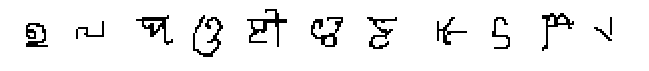

______________________________________________________________________________________________________________

seed = 126, percent improvement = 32.0    ---    us: 20.6, them: 30.3

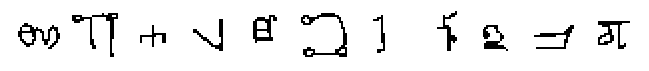

______________________________________________________________________________________________________________

seed = 127, percent improvement = 36.5    ---    us: 20.5, them: 32.3

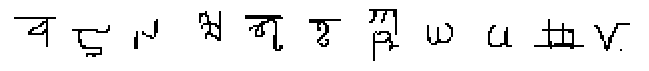

______________________________________________________________________________________________________________

seed = 128, percent improvement = 38.3    ---    us: 21.2, them: 34.4

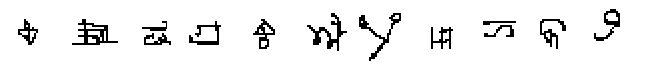

______________________________________________________________________________________________________________

seed = 129, percent improvement = 41.9    ---    us: 18.7, them: 32.1

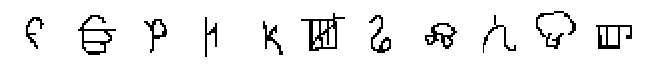

______________________________________________________________________________________________________________

seed = 130, percent improvement = 42.8    ---    us: 16.8, them: 29.3

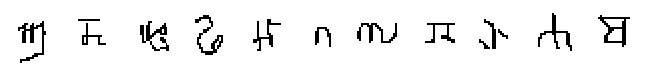

______________________________________________________________________________________________________________

seed = 131, percent improvement = 41.5    ---    us: 16.7, them: 28.5

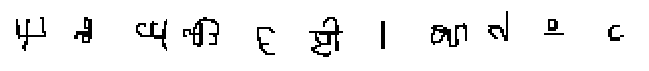

______________________________________________________________________________________________________________

seed = 132, percent improvement = 40.0    ---    us: 15.4, them: 25.7

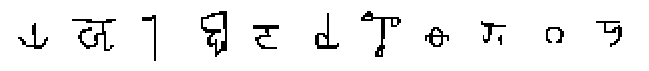

______________________________________________________________________________________________________________

seed = 133, percent improvement = 40.8    ---    us: 18.9, them: 31.9

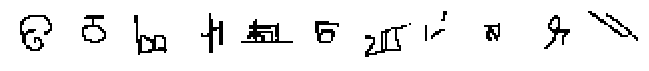

______________________________________________________________________________________________________________

seed = 134, percent improvement = 39.2    ---    us: 17.4, them: 28.6

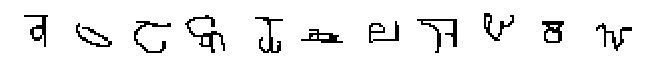

______________________________________________________________________________________________________________

seed = 135, percent improvement = 49.8    ---    us: 12.0, them: 24.0

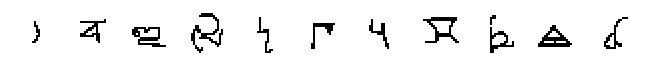

______________________________________________________________________________________________________________

seed = 136, percent improvement = 44.9    ---    us: 16.0, them: 29.0

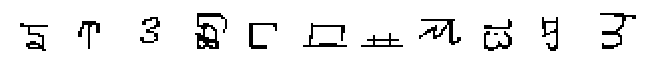

______________________________________________________________________________________________________________

seed = 137, percent improvement = 35.1    ---    us: 19.9, them: 30.6

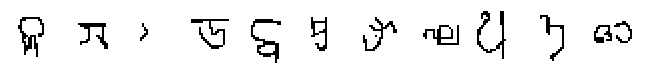

______________________________________________________________________________________________________________

seed = 138, percent improvement = 37.6    ---    us: 23.9, them: 38.3

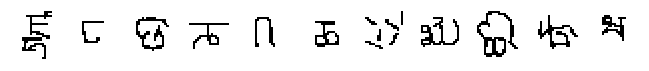

______________________________________________________________________________________________________________

seed = 139, percent improvement = 38.5    ---    us: 22.7, them: 36.9

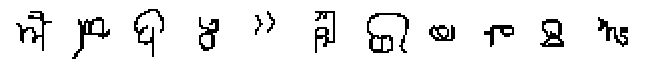

______________________________________________________________________________________________________________

seed = 140, percent improvement = 39.9    ---    us: 16.2, them: 26.9

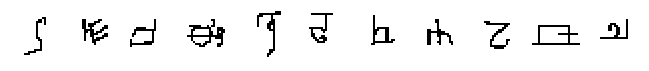

______________________________________________________________________________________________________________

seed = 141, percent improvement = 40.3    ---    us: 20.0, them: 33.5

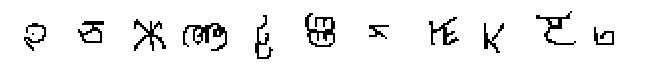

______________________________________________________________________________________________________________

seed = 142, percent improvement = 53.4    ---    us: 11.7, them: 25.1

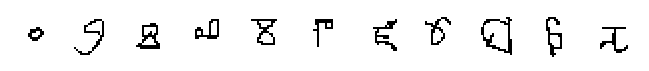

______________________________________________________________________________________________________________

seed = 143, percent improvement = 36.9    ---    us: 23.3, them: 37.0

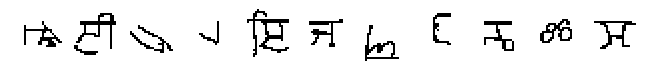

______________________________________________________________________________________________________________

seed = 144, percent improvement = 43.6    ---    us: 15.5, them: 27.4

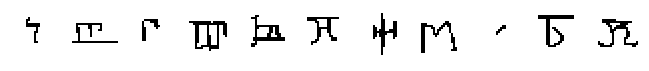

______________________________________________________________________________________________________________

seed = 145, percent improvement = 41.0    ---    us: 18.2, them: 30.8

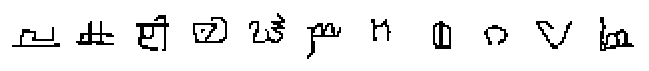

______________________________________________________________________________________________________________

seed = 146, percent improvement = 26.5    ---    us: 24.8, them: 33.7

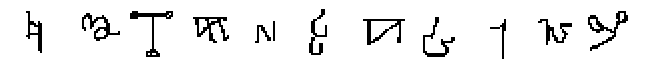

______________________________________________________________________________________________________________

seed = 147, percent improvement = 36.2    ---    us: 21.7, them: 34.0

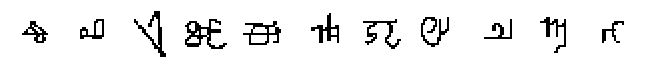

______________________________________________________________________________________________________________

seed = 148, percent improvement = 38.0    ---    us: 18.6, them: 30.0

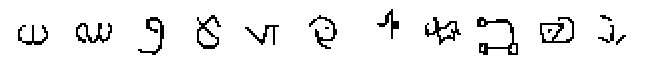

______________________________________________________________________________________________________________

seed = 149, percent improvement = 36.0    ---    us: 18.4, them: 28.7

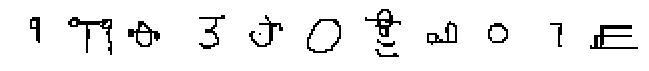

______________________________________________________________________________________________________________

seed = 150, percent improvement = 45.7    ---    us: 14.2, them: 26.2

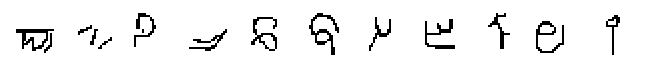

______________________________________________________________________________________________________________

seed = 151, percent improvement = 36.1    ---    us: 23.6, them: 36.9

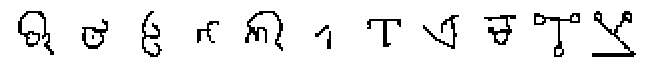

______________________________________________________________________________________________________________

seed = 152, percent improvement = 40.2    ---    us: 19.0, them: 31.8

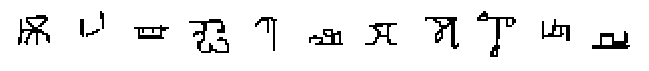

______________________________________________________________________________________________________________

seed = 153, percent improvement = 36.4    ---    us: 23.1, them: 36.4

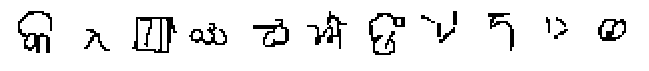

______________________________________________________________________________________________________________

seed = 154, percent improvement = 41.8    ---    us: 19.4, them: 33.4

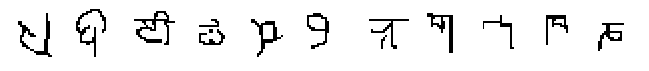

______________________________________________________________________________________________________________

seed = 155, percent improvement = 41.9    ---    us: 17.2, them: 29.6

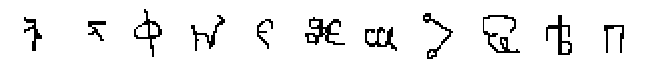

______________________________________________________________________________________________________________

seed = 156, percent improvement = 30.9    ---    us: 26.7, them: 38.6

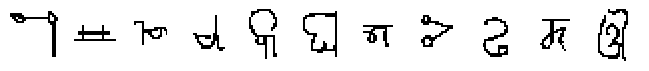

______________________________________________________________________________________________________________

seed = 157, percent improvement = 41.2    ---    us: 17.4, them: 29.6

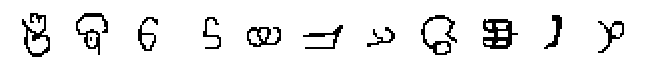

______________________________________________________________________________________________________________

seed = 158, percent improvement = 44.2    ---    us: 16.9, them: 30.2

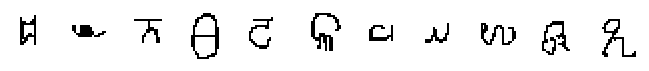

______________________________________________________________________________________________________________

seed = 159, percent improvement = 26.7    ---    us: 21.1, them: 28.8

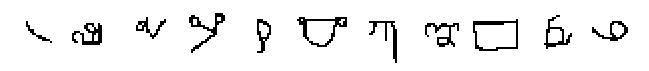

______________________________________________________________________________________________________________

seed = 160, percent improvement = 33.1    ---    us: 18.6, them: 27.9

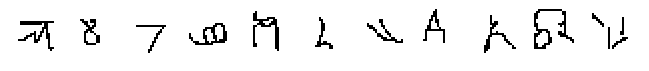

______________________________________________________________________________________________________________

seed = 161, percent improvement = 37.9    ---    us: 18.6, them: 30.0

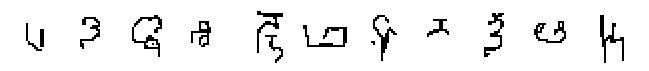

______________________________________________________________________________________________________________

seed = 162, percent improvement = 35.1    ---    us: 25.1, them: 38.7

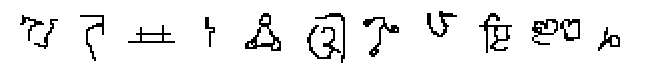

______________________________________________________________________________________________________________

seed = 163, percent improvement = 36.9    ---    us: 20.6, them: 32.7

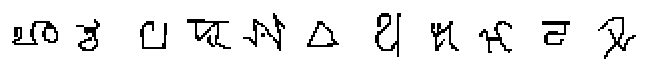

______________________________________________________________________________________________________________

seed = 164, percent improvement = 36.3    ---    us: 19.3, them: 30.3

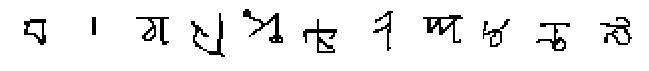

______________________________________________________________________________________________________________

seed = 165, percent improvement = 46.7    ---    us: 15.6, them: 29.3

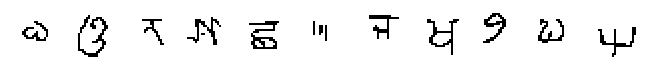

______________________________________________________________________________________________________________

seed = 166, percent improvement = 36.3    ---    us: 23.0, them: 36.1

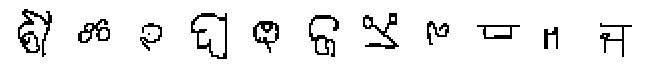

______________________________________________________________________________________________________________

seed = 167, percent improvement = 43.2    ---    us: 19.9, them: 34.9

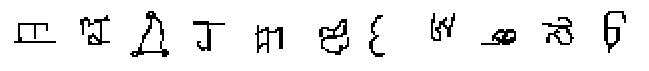

______________________________________________________________________________________________________________

seed = 168, percent improvement = 39.0    ---    us: 19.3, them: 31.6

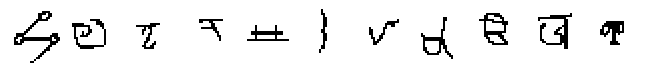

______________________________________________________________________________________________________________

seed = 169, percent improvement = 41.2    ---    us: 19.4, them: 33.0

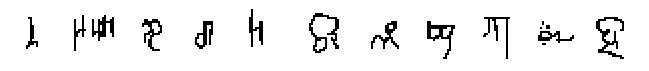

______________________________________________________________________________________________________________

seed = 170, percent improvement = 40.5    ---    us: 17.1, them: 28.7

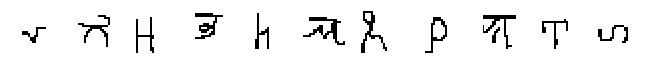

______________________________________________________________________________________________________________

seed = 171, percent improvement = 39.0    ---    us: 21.8, them: 35.8

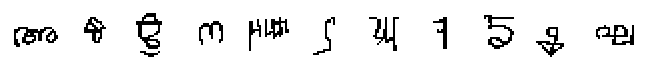

______________________________________________________________________________________________________________

seed = 172, percent improvement = 43.2    ---    us: 16.9, them: 29.8

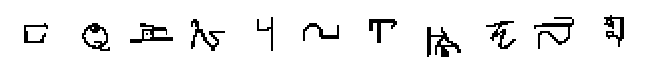

______________________________________________________________________________________________________________

seed = 173, percent improvement = 39.0    ---    us: 18.5, them: 30.4

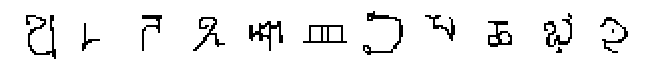

______________________________________________________________________________________________________________

seed = 174, percent improvement = 40.1    ---    us: 20.2, them: 33.7

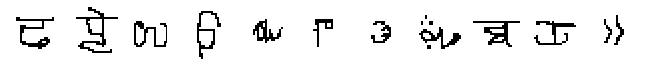

______________________________________________________________________________________________________________

seed = 175, percent improvement = 40.7    ---    us: 15.7, them: 26.5

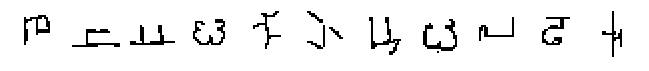

______________________________________________________________________________________________________________

seed = 176, percent improvement = 37.7    ---    us: 20.0, them: 32.1

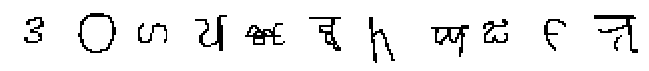

______________________________________________________________________________________________________________

seed = 177, percent improvement = 38.6    ---    us: 20.8, them: 33.9

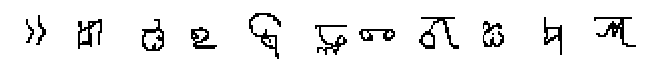

______________________________________________________________________________________________________________

seed = 178, percent improvement = 38.8    ---    us: 16.7, them: 27.3

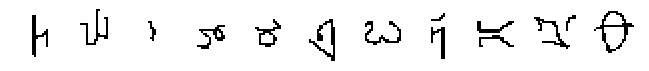

______________________________________________________________________________________________________________

seed = 179, percent improvement = 41.3    ---    us: 18.5, them: 31.5

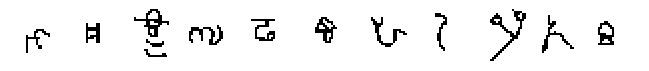

______________________________________________________________________________________________________________

seed = 180, percent improvement = 40.6    ---    us: 18.1, them: 30.5

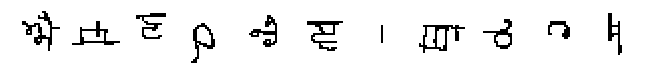

______________________________________________________________________________________________________________

seed = 181, percent improvement = 35.3    ---    us: 24.2, them: 37.5

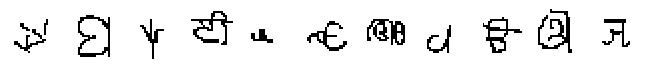

______________________________________________________________________________________________________________

seed = 182, percent improvement = 42.1    ---    us: 16.3, them: 28.2

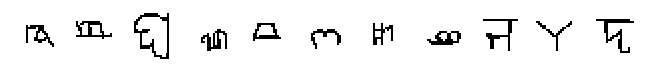

______________________________________________________________________________________________________________

seed = 183, percent improvement = 34.6    ---    us: 21.7, them: 33.2

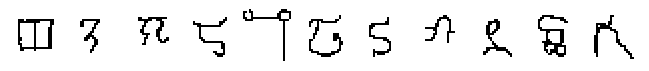

______________________________________________________________________________________________________________

seed = 184, percent improvement = 34.3    ---    us: 22.7, them: 34.6

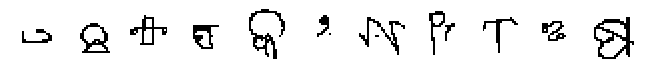

______________________________________________________________________________________________________________

seed = 185, percent improvement = 39.6    ---    us: 16.1, them: 26.7

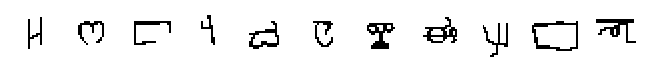

______________________________________________________________________________________________________________

seed = 186, percent improvement = 49.1    ---    us: 13.5, them: 26.5

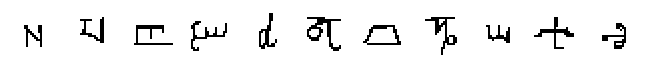

______________________________________________________________________________________________________________

seed = 187, percent improvement = 40.7    ---    us: 16.2, them: 27.4

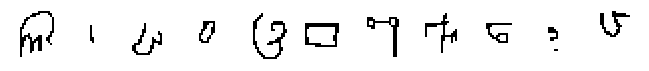

______________________________________________________________________________________________________________

seed = 188, percent improvement = 34.0    ---    us: 20.9, them: 31.7

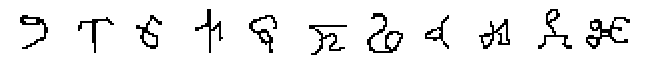

______________________________________________________________________________________________________________

seed = 189, percent improvement = 43.9    ---    us: 18.2, them: 32.5

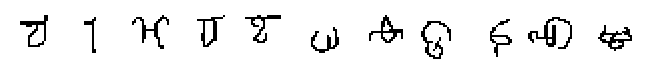

______________________________________________________________________________________________________________

seed = 190, percent improvement = 39.9    ---    us: 21.1, them: 35.2

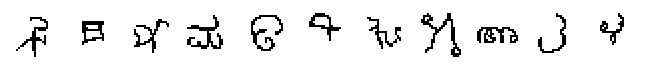

______________________________________________________________________________________________________________

seed = 191, percent improvement = 35.2    ---    us: 20.6, them: 31.8

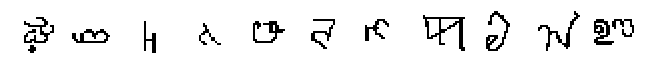

______________________________________________________________________________________________________________

seed = 192, percent improvement = 36.2    ---    us: 21.1, them: 33.0

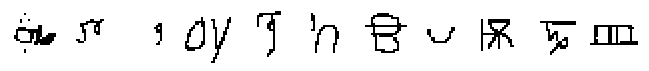

______________________________________________________________________________________________________________

seed = 193, percent improvement = 38.7    ---    us: 19.5, them: 31.8

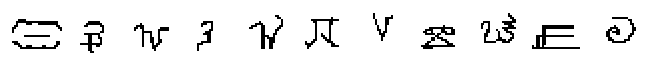

______________________________________________________________________________________________________________

seed = 194, percent improvement = 30.1    ---    us: 23.1, them: 33.0

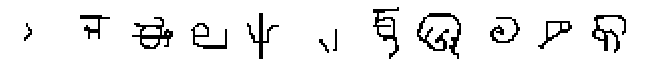

______________________________________________________________________________________________________________

seed = 195, percent improvement = 35.8    ---    us: 18.1, them: 28.3

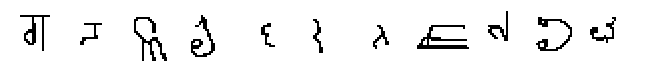

______________________________________________________________________________________________________________

seed = 196, percent improvement = 36.6    ---    us: 22.7, them: 35.7

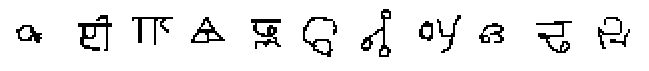

______________________________________________________________________________________________________________

seed = 197, percent improvement = 38.3    ---    us: 20.4, them: 33.1

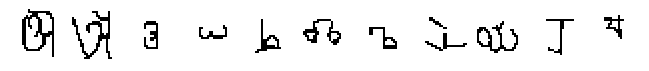

______________________________________________________________________________________________________________

seed = 198, percent improvement = 44.2    ---    us: 17.5, them: 31.5

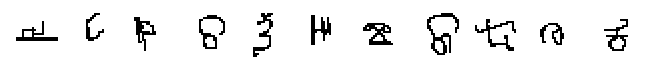

______________________________________________________________________________________________________________

seed = 199, percent improvement = 41.1    ---    us: 18.3, them: 31.1

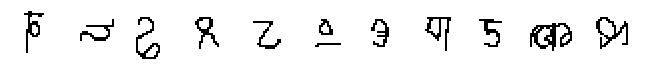

In [61]:
ds = 'Omniglot'

for seed in range(200):
    inds = get_dataset_inds(seed)

    vld = make_dataset(ds)[1]
    vld = tonp(vld.tensors[0])
    vld = vld[inds[ds]]

    mse_us = results['mse'][:, -1][inds[ds]].mean()
    mse_them = mse_kim[inds[ds]].mean()

    percent_improv = 100 * (mse_them - mse_us) / mse_them

    print('_' * 110)
    print(f"seed = {seed}, percent improvement = {percent_improv:0.1f}    ---    us: {mse_us:0.1f}, them: {mse_them:0.1f}")
    _ = plot_row_or_col(vld, display=True)

    print('\n')

In [63]:
xxx_us = tr.to(results['mse'][:, -1])
xxx_them = tr.to(mse_kim)

In [64]:
ds = 'Omniglot'

percent_improv = {}
for seed in tqdm(range(10000)):
    inds = get_dataset_inds(seed)

    mse_us = xxx_us[inds[ds]].mean()
    mse_them = xxx_them[inds[ds]].mean()

    percent_improv[seed] = 100 * (mse_them - mse_us) / mse_them

percent_improv = {k: v.item() for k, v in percent_improv.items()}

100%|█████████████████████████████████████| 10000/10000 [25:03<00:00,  6.65it/s]


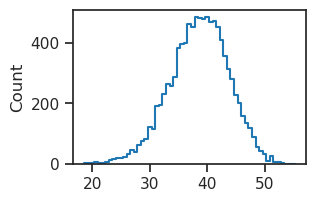

In [72]:
histplot(list(percent_improv.values()));

In [73]:
sorted_dict = dict(sorted(percent_improv.items(), key=lambda item: item[1], reverse=True))

[8408, 7537, 142, 904, 4396, 7800, 6688, 9612, 7986, 4305]

______________________________________________________________________________________________________________

seed = 6257, percent improvement = 49.4    ---    us: 13.4, them: 26.5

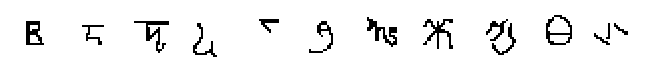

______________________________________________________________________________________________________________

seed = 9675, percent improvement = 49.3    ---    us: 12.3, them: 24.3

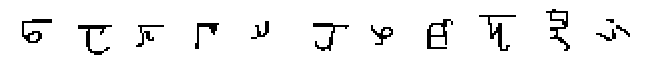

______________________________________________________________________________________________________________

seed = 8682, percent improvement = 49.3    ---    us: 13.4, them: 26.5

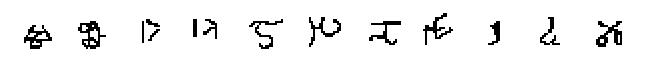

______________________________________________________________________________________________________________

seed = 6226, percent improvement = 49.3    ---    us: 13.9, them: 27.4

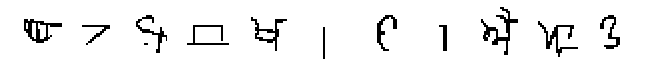

______________________________________________________________________________________________________________

seed = 3152, percent improvement = 49.3    ---    us: 13.4, them: 26.5

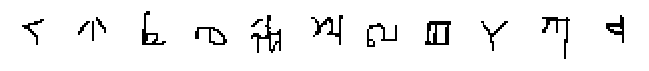

______________________________________________________________________________________________________________

seed = 4014, percent improvement = 49.3    ---    us: 14.5, them: 28.5

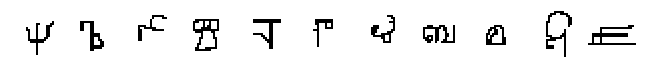

______________________________________________________________________________________________________________

seed = 9697, percent improvement = 49.3    ---    us: 14.0, them: 27.6

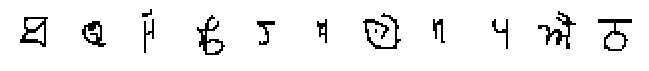

______________________________________________________________________________________________________________

seed = 9833, percent improvement = 49.3    ---    us: 12.8, them: 25.1

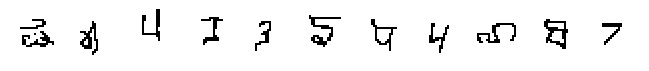

______________________________________________________________________________________________________________

seed = 908, percent improvement = 49.3    ---    us: 12.5, them: 24.7

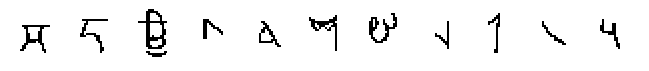

______________________________________________________________________________________________________________

seed = 8548, percent improvement = 49.2    ---    us: 12.8, them: 25.2

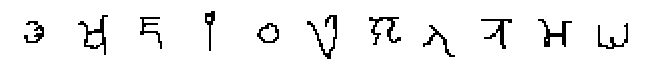

______________________________________________________________________________________________________________

seed = 898, percent improvement = 49.2    ---    us: 12.1, them: 23.8

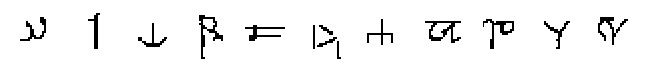

______________________________________________________________________________________________________________

seed = 8048, percent improvement = 49.2    ---    us: 14.4, them: 28.3

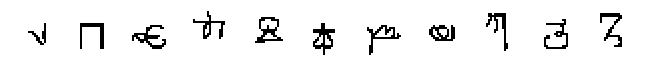

______________________________________________________________________________________________________________

seed = 1070, percent improvement = 49.2    ---    us: 13.8, them: 27.3

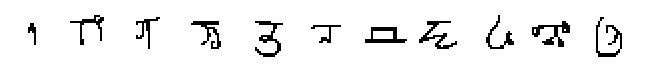

______________________________________________________________________________________________________________

seed = 1759, percent improvement = 49.2    ---    us: 13.3, them: 26.3

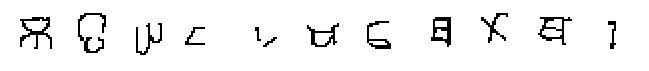

______________________________________________________________________________________________________________

seed = 8584, percent improvement = 49.2    ---    us: 13.7, them: 27.0

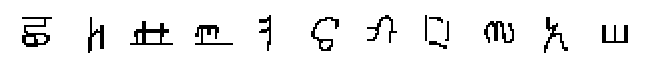

______________________________________________________________________________________________________________

seed = 6634, percent improvement = 49.2    ---    us: 13.9, them: 27.3

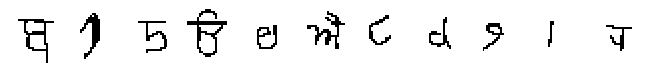

______________________________________________________________________________________________________________

seed = 9633, percent improvement = 49.2    ---    us: 14.9, them: 29.4

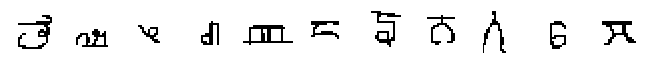

______________________________________________________________________________________________________________

seed = 8869, percent improvement = 49.2    ---    us: 16.4, them: 32.3

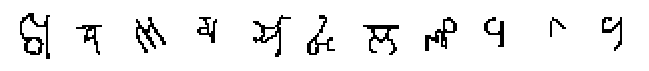

______________________________________________________________________________________________________________

seed = 5249, percent improvement = 49.2    ---    us: 16.2, them: 31.9

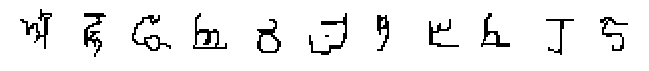

______________________________________________________________________________________________________________

seed = 1766, percent improvement = 49.2    ---    us: 15.1, them: 29.7

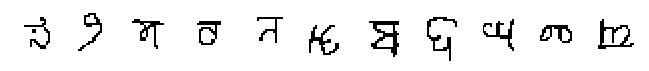

______________________________________________________________________________________________________________

seed = 9016, percent improvement = 49.1    ---    us: 12.7, them: 24.9

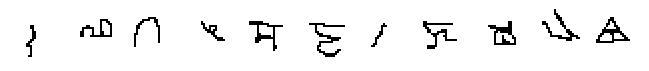

______________________________________________________________________________________________________________

seed = 8149, percent improvement = 49.1    ---    us: 12.7, them: 25.0

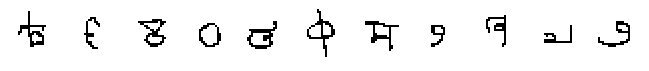

______________________________________________________________________________________________________________

seed = 186, percent improvement = 49.1    ---    us: 13.5, them: 26.5

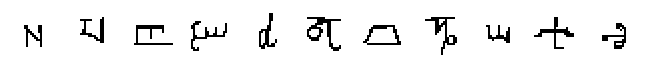

______________________________________________________________________________________________________________

seed = 6529, percent improvement = 49.1    ---    us: 11.5, them: 22.7

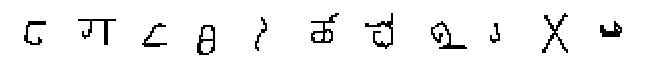

______________________________________________________________________________________________________________

seed = 66, percent improvement = 49.1    ---    us: 12.6, them: 24.8

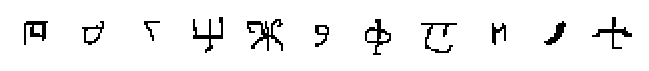

______________________________________________________________________________________________________________

seed = 2081, percent improvement = 49.1    ---    us: 14.3, them: 28.1

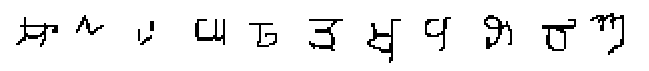

______________________________________________________________________________________________________________

seed = 4477, percent improvement = 49.1    ---    us: 16.2, them: 31.8

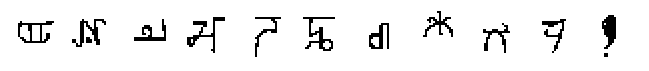

______________________________________________________________________________________________________________

seed = 3218, percent improvement = 48.9    ---    us: 14.4, them: 28.2

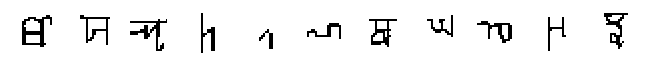

______________________________________________________________________________________________________________

seed = 8458, percent improvement = 48.9    ---    us: 12.6, them: 24.6

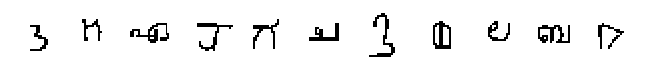

______________________________________________________________________________________________________________

seed = 3173, percent improvement = 48.9    ---    us: 13.5, them: 26.5

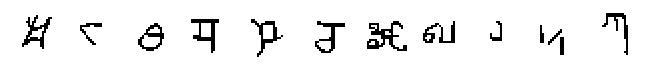

______________________________________________________________________________________________________________

seed = 2759, percent improvement = 48.9    ---    us: 12.1, them: 23.7

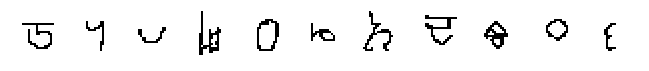

______________________________________________________________________________________________________________

seed = 9672, percent improvement = 48.9    ---    us: 14.3, them: 27.9

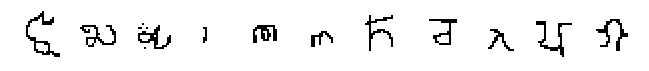

______________________________________________________________________________________________________________

seed = 3897, percent improvement = 48.9    ---    us: 13.2, them: 25.8

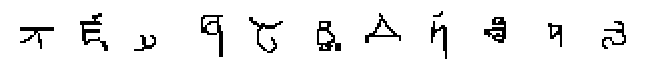

______________________________________________________________________________________________________________

seed = 6125, percent improvement = 48.9    ---    us: 12.4, them: 24.3

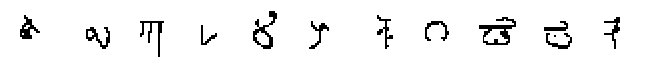

______________________________________________________________________________________________________________

seed = 632, percent improvement = 48.9    ---    us: 12.8, them: 25.1

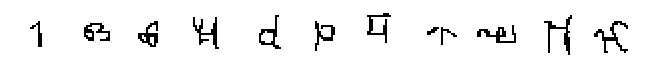

______________________________________________________________________________________________________________

seed = 2823, percent improvement = 48.9    ---    us: 13.4, them: 26.1

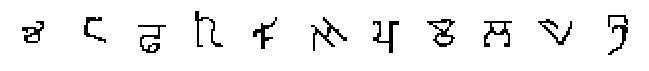

______________________________________________________________________________________________________________

seed = 8784, percent improvement = 48.9    ---    us: 12.3, them: 24.1

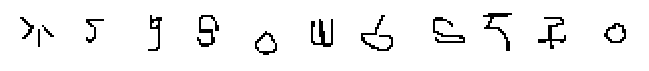

______________________________________________________________________________________________________________

seed = 6829, percent improvement = 48.9    ---    us: 14.6, them: 28.5

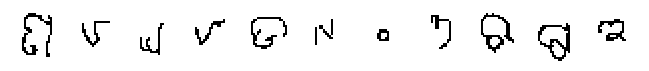

______________________________________________________________________________________________________________

seed = 3487, percent improvement = 48.9    ---    us: 13.4, them: 26.2

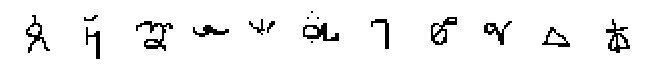

______________________________________________________________________________________________________________

seed = 5838, percent improvement = 48.9    ---    us: 15.7, them: 30.8

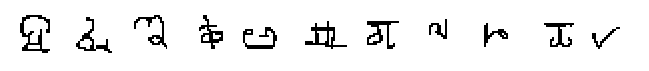

______________________________________________________________________________________________________________

seed = 713, percent improvement = 48.9    ---    us: 13.8, them: 27.0

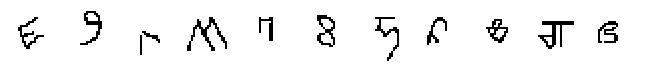

______________________________________________________________________________________________________________

seed = 9235, percent improvement = 48.9    ---    us: 12.7, them: 24.9

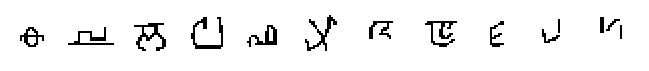

______________________________________________________________________________________________________________

seed = 8128, percent improvement = 48.8    ---    us: 17.4, them: 34.0

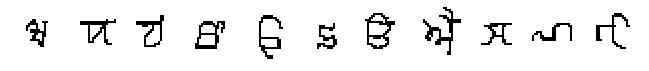

______________________________________________________________________________________________________________

seed = 918, percent improvement = 48.8    ---    us: 12.9, them: 25.1

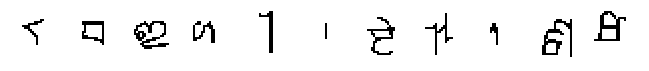

______________________________________________________________________________________________________________

seed = 4493, percent improvement = 48.8    ---    us: 13.3, them: 26.0

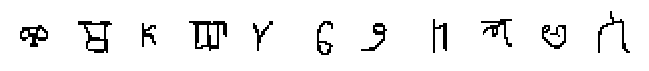

______________________________________________________________________________________________________________

seed = 4030, percent improvement = 48.8    ---    us: 16.0, them: 31.3

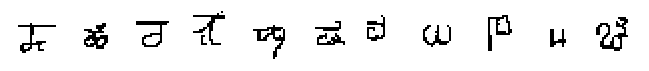

______________________________________________________________________________________________________________

seed = 6037, percent improvement = 48.8    ---    us: 16.2, them: 31.6

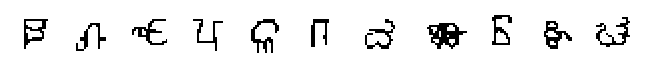

______________________________________________________________________________________________________________

seed = 3161, percent improvement = 48.7    ---    us: 13.8, them: 26.9

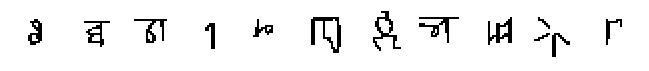

______________________________________________________________________________________________________________

seed = 5926, percent improvement = 48.7    ---    us: 13.1, them: 25.5

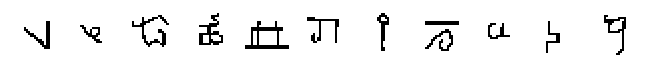

______________________________________________________________________________________________________________

seed = 7387, percent improvement = 48.7    ---    us: 13.0, them: 25.3

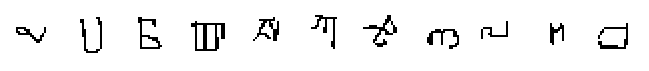

______________________________________________________________________________________________________________

seed = 9923, percent improvement = 48.7    ---    us: 14.0, them: 27.4

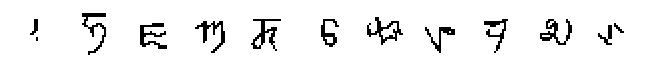

______________________________________________________________________________________________________________

seed = 1248, percent improvement = 48.7    ---    us: 16.1, them: 31.4

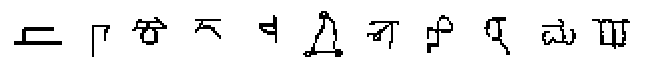

______________________________________________________________________________________________________________

seed = 8332, percent improvement = 48.7    ---    us: 13.9, them: 27.0

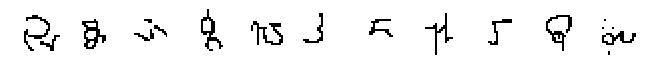

______________________________________________________________________________________________________________

seed = 9847, percent improvement = 48.7    ---    us: 13.8, them: 26.8

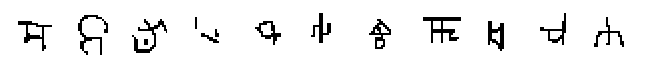

______________________________________________________________________________________________________________

seed = 6826, percent improvement = 48.7    ---    us: 14.0, them: 27.3

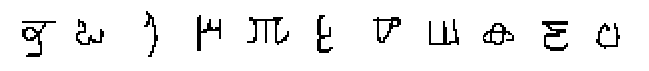

______________________________________________________________________________________________________________

seed = 9078, percent improvement = 48.7    ---    us: 12.4, them: 24.2

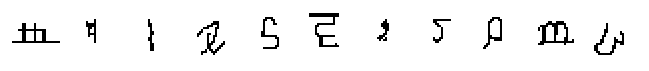

______________________________________________________________________________________________________________

seed = 9962, percent improvement = 48.6    ---    us: 11.9, them: 23.2

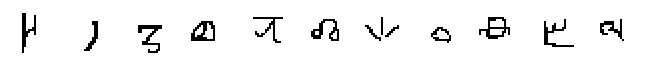

______________________________________________________________________________________________________________

seed = 9596, percent improvement = 48.6    ---    us: 14.3, them: 27.9

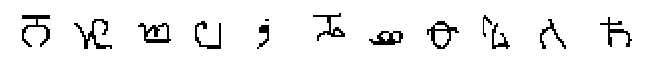

______________________________________________________________________________________________________________

seed = 6192, percent improvement = 48.6    ---    us: 15.0, them: 29.3

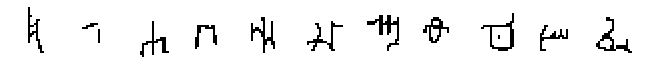

______________________________________________________________________________________________________________

seed = 3515, percent improvement = 48.6    ---    us: 14.1, them: 27.4

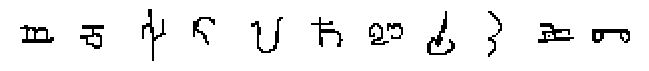

______________________________________________________________________________________________________________

seed = 2209, percent improvement = 48.6    ---    us: 14.2, them: 27.6

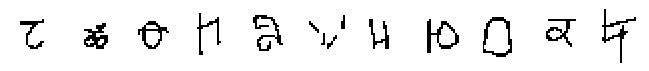

______________________________________________________________________________________________________________

seed = 1484, percent improvement = 48.6    ---    us: 14.8, them: 28.8

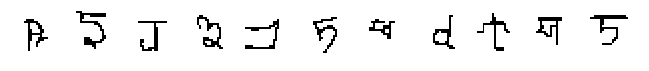

______________________________________________________________________________________________________________

seed = 5456, percent improvement = 48.6    ---    us: 14.4, them: 28.0

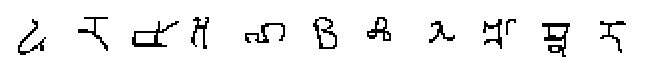

______________________________________________________________________________________________________________

seed = 8314, percent improvement = 48.5    ---    us: 13.7, them: 26.7

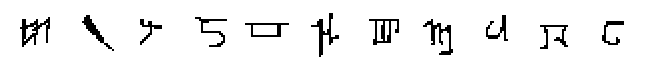

______________________________________________________________________________________________________________

seed = 9945, percent improvement = 48.5    ---    us: 15.3, them: 29.7

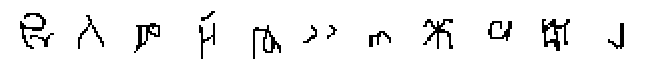

______________________________________________________________________________________________________________

seed = 9091, percent improvement = 48.5    ---    us: 12.5, them: 24.4

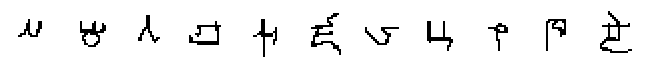

______________________________________________________________________________________________________________

seed = 2728, percent improvement = 48.5    ---    us: 12.0, them: 23.3

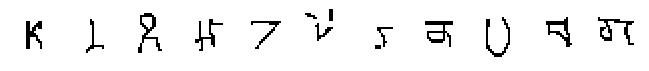

______________________________________________________________________________________________________________

seed = 7438, percent improvement = 48.5    ---    us: 15.9, them: 31.0

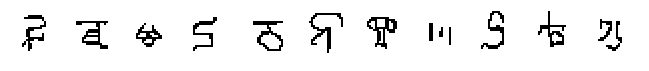

______________________________________________________________________________________________________________

seed = 2051, percent improvement = 48.5    ---    us: 15.3, them: 29.8

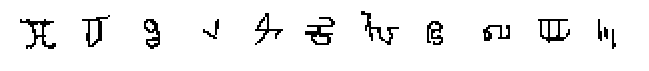

______________________________________________________________________________________________________________

seed = 6966, percent improvement = 48.5    ---    us: 11.9, them: 23.1

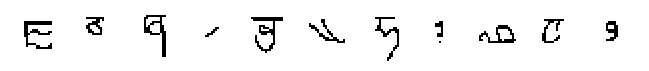

______________________________________________________________________________________________________________

seed = 6741, percent improvement = 48.5    ---    us: 12.3, them: 23.9

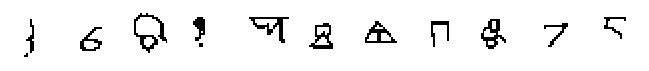

______________________________________________________________________________________________________________

seed = 765, percent improvement = 48.5    ---    us: 12.7, them: 24.6

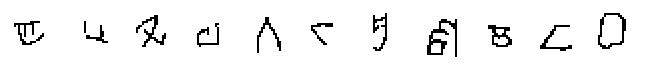

______________________________________________________________________________________________________________

seed = 9461, percent improvement = 48.5    ---    us: 15.0, them: 29.1

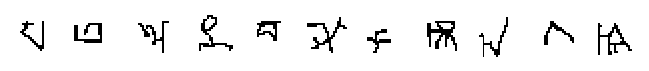

______________________________________________________________________________________________________________

seed = 1101, percent improvement = 48.5    ---    us: 14.3, them: 27.7

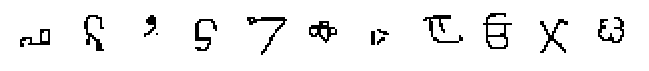

______________________________________________________________________________________________________________

seed = 688, percent improvement = 48.5    ---    us: 13.4, them: 26.0

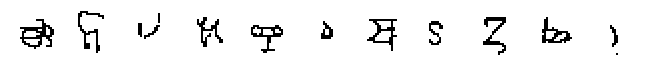

______________________________________________________________________________________________________________

seed = 814, percent improvement = 48.5    ---    us: 13.7, them: 26.6

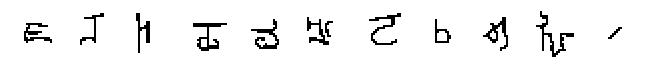

______________________________________________________________________________________________________________

seed = 2205, percent improvement = 48.4    ---    us: 13.1, them: 25.3

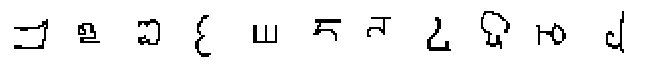

______________________________________________________________________________________________________________

seed = 5348, percent improvement = 48.4    ---    us: 14.9, them: 28.9

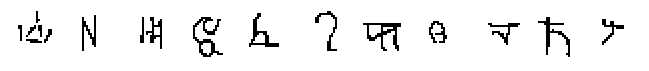

______________________________________________________________________________________________________________

seed = 5062, percent improvement = 48.4    ---    us: 13.5, them: 26.2

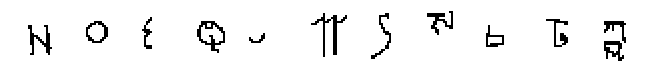

______________________________________________________________________________________________________________

seed = 2408, percent improvement = 48.4    ---    us: 13.1, them: 25.4

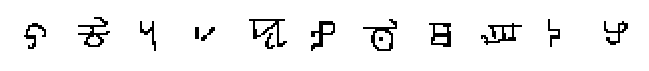

______________________________________________________________________________________________________________

seed = 4108, percent improvement = 48.4    ---    us: 15.9, them: 30.8

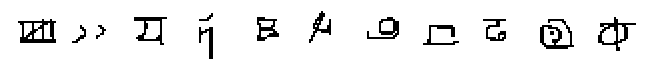

______________________________________________________________________________________________________________

seed = 1050, percent improvement = 48.4    ---    us: 15.5, them: 30.0

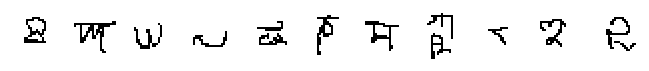

______________________________________________________________________________________________________________

seed = 9779, percent improvement = 48.4    ---    us: 16.2, them: 31.4

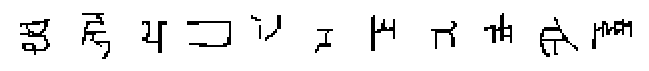

______________________________________________________________________________________________________________

seed = 6874, percent improvement = 48.4    ---    us: 15.3, them: 29.6

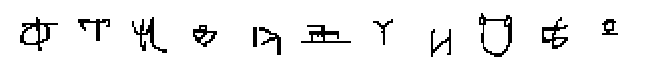

______________________________________________________________________________________________________________

seed = 4556, percent improvement = 48.4    ---    us: 11.6, them: 22.4

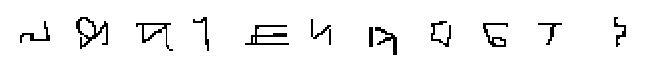

______________________________________________________________________________________________________________

seed = 974, percent improvement = 48.4    ---    us: 14.8, them: 28.7

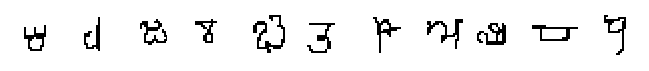

______________________________________________________________________________________________________________

seed = 9950, percent improvement = 48.4    ---    us: 14.4, them: 27.8

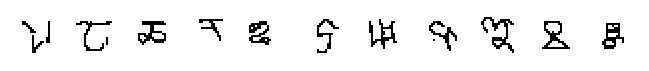

______________________________________________________________________________________________________________

seed = 2872, percent improvement = 48.3    ---    us: 12.7, them: 24.5

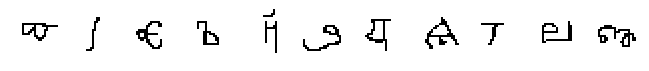

______________________________________________________________________________________________________________

seed = 1479, percent improvement = 48.3    ---    us: 13.7, them: 26.5

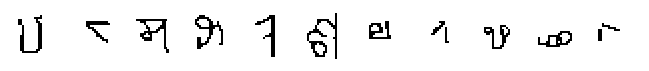

______________________________________________________________________________________________________________

seed = 1164, percent improvement = 48.3    ---    us: 16.4, them: 31.8

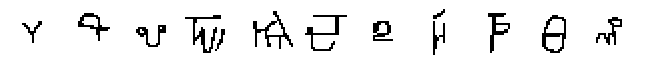

______________________________________________________________________________________________________________

seed = 217, percent improvement = 48.3    ---    us: 12.7, them: 24.6

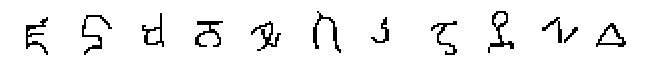

______________________________________________________________________________________________________________

seed = 8235, percent improvement = 48.3    ---    us: 17.6, them: 34.0

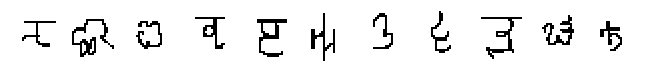

______________________________________________________________________________________________________________

seed = 242, percent improvement = 48.3    ---    us: 17.2, them: 33.3

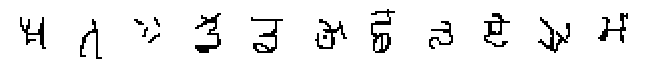

______________________________________________________________________________________________________________

seed = 4448, percent improvement = 48.3    ---    us: 14.5, them: 28.1

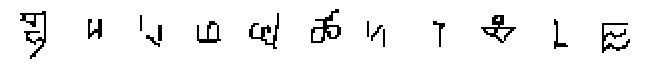

______________________________________________________________________________________________________________

seed = 4996, percent improvement = 48.3    ---    us: 13.9, them: 26.9

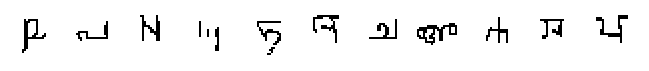

______________________________________________________________________________________________________________

seed = 1427, percent improvement = 48.3    ---    us: 15.2, them: 29.4

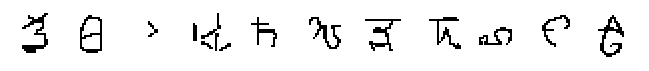

______________________________________________________________________________________________________________

seed = 7357, percent improvement = 48.3    ---    us: 14.2, them: 27.5

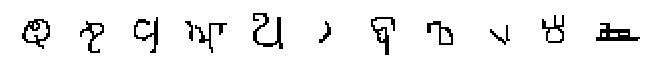

______________________________________________________________________________________________________________

seed = 3279, percent improvement = 48.3    ---    us: 12.2, them: 23.7

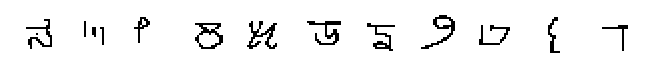

______________________________________________________________________________________________________________

seed = 5640, percent improvement = 48.2    ---    us: 15.8, them: 30.6

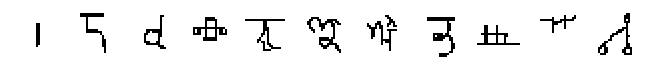

______________________________________________________________________________________________________________

seed = 1920, percent improvement = 48.2    ---    us: 16.0, them: 30.8

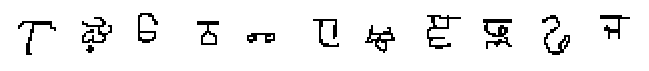

In [82]:
ds = 'Omniglot'

for seed in list(sorted_dict)[100:200]:
    inds = get_dataset_inds(seed)

    vld = make_dataset(ds)[1]
    vld = tonp(vld.tensors[0])
    vld = vld[inds[ds]]

    mse_us = results['mse'][:, -1][inds[ds]].mean()
    mse_them = mse_kim[inds[ds]].mean()

    percent_improv = 100 * (mse_them - mse_us) / mse_them

    print('_' * 110)
    print(f"seed = {seed}, percent improvement = {percent_improv:0.1f}    ---    us: {mse_us:0.1f}, them: {mse_them:0.1f}")
    _ = plot_row_or_col(vld, display=True)

In [ ]:
5249

In [ ]:
9779

In [26]:
def get_dataset_inds():
	inds = {}

	# MNIST
	vld = make_dataset('MNIST')[1]
	_inds = first_occurrence_inds(
		items=vld.tensors[1],
		num=10,
	)
	digits = tonp(vld.tensors[1][_inds])
	_inds, _ = zip(*sorted(
		zip(_inds, digits),
		key=lambda t: t[1],
	))
	inds['MNIST'] = _inds

	inds['Omniglot'] = [
		12710, 5616, 2649, 370, 8713,
		9519, 9638, 6146, 9675, 8900, 12934,
	]
	inds['EMNIST'] = [
		1, 2603, 213, 12173, 15308, 6946,
		17063, 3510, 4638, 15626, 18359,
	]

	# finalize: to array
	inds = {
		k: np.asarray(v) for
		k, v in inds.items()
	}
	return inds

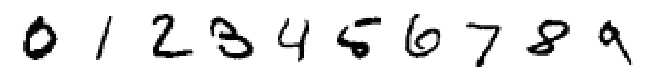

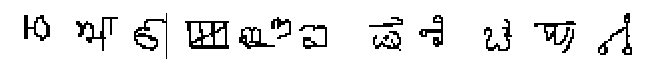

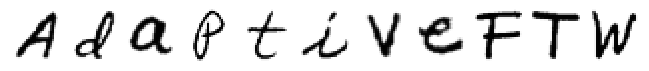

In [27]:
inds = get_dataset_inds()

for ds in inds:
    vld = make_dataset(ds)[1]
    vld = tonp(vld.tensors[0])
    vld = vld[inds[ds]]
    _ = plot_row_or_col(vld, display=True)

In [28]:
sns.color_palette('muted')

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [4]:
rng = get_rng(8)

In [5]:
vld = make_dataset('Omniglot')[1]
n_samples = len(vld)

In [6]:
shuff = np.arange(n_samples)

In [21]:
rng.shuffle(shuff)
inds = first_occurrence_inds(vld.tensors[1][shuff])
inds = shuff[inds]

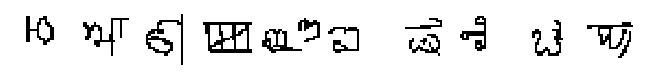

(<Figure size 640x320 with 1 Axes>, <Axes: >)

In [24]:
plot_row_or_col(vld.tensors[0][inds], True, True)

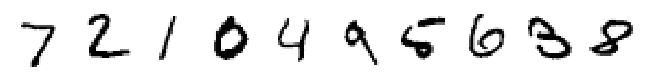

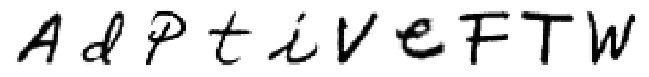

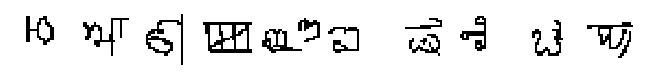

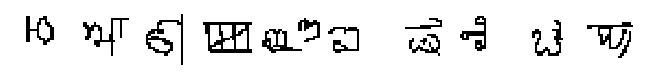

In [5]:
_ = plot_row_or_col(vld[:10], display=True)

In [84]:
vld = make_dataset('EMNIST')[1]
vld = tonp(vld.tensors[0])

In [139]:
i = 1700

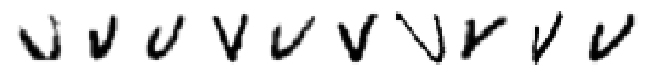

In [145]:
i += 1
_ = plot_row_or_col(vld[i*10:(i+1)*10], display=True)

In [146]:
i

1706

In [336]:
i -= 2

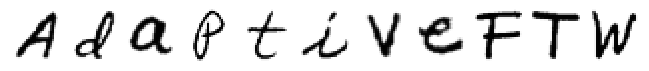

In [147]:
inds_selected = 
_ = plot_row_or_col(vld[inds_selected], display=True)

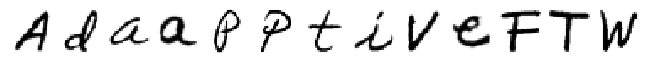

In [28]:
inds_selected = [1, 2603, 40, 23, 12173, 12293, 15308, 6946, 17043, 3510, 4638, 15626, 18359]
_ = plot_row_or_col(vld[inds_selected], display=True)

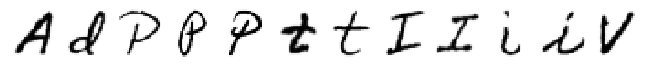

In [414]:
inds_selected = [1, 2603, 12017, 12173, 12293, 15207, 15308, 6438, 6515, 6868, 6946, 17043]
_ = plot_row_or_col(vld[inds_selected], display=True)

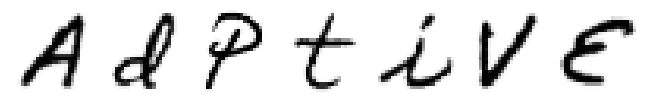

In [3]:
key = 'MNIST_<jacob|conv>_(32,16.0)'

In [4]:
kws_load = selected_models_28x28(device)[key]
tr, meta = load_model(**kws_load)
meta['checkpoint']

360

In [5]:
from analysis.ood import ood_analysis

In [6]:
accuracy, results = ood_analysis(tr, 'Omniglot', t_recon=1000, verbose=True)

100%|█████████████████████████████████| 66/66 [30:15<00:00, 27.51s/it]


In [8]:
list(results)

['props',
 'kl',
 'mse',
 'nelbo',
 'du_norm',
 'lifetime',
 'population',
 'state_final',
 'samples_final',
 'recon']

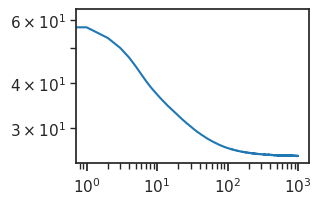

In [11]:
plt.loglog(results['mse']);

In [12]:
results['mse'][-1]

25.091608

In [14]:
total_num_params = sum([
    p.nelement() for p
    in tr.parameters()
])
print(f"{total_num_params / 1e6:0.2f}")

1.13

In [3]:
path = "/home/hadi/Datasets/" + "omniglot-py" + "/processed/"
val = np.load(path + "x_vld.npy")*255
mrsl = np.load("/Data/hadi/eval_results/rot_full/MARINO_omniglot-hadi_single_level_iterative_OMNIGLOT_HADI_SL_10_full.npz")
((mrsl["recons_val"][...,0]/255- val[:, 0]/255)**2).mean(0).sum()

21.261282

In [3]:
trn, vld, _ = make_dataset('MNIST', device)

In [4]:
hm = "/Data/hadi/eval_results/"
x_vld = vld.tensors[0]

h = np.load(hm+"MARINO_mnist_hierarchical_iterative_MNIST_H_1000.npz")["recons"]/255.0
sl = np.load(hm+"MARINO_mnist_single_level_iterative_MNIST_SL_1000.npz")["recons"]/255.0
sv = (np.load(hm+"SAVAE_mnist_iter1000.npz")["recons"])[:,:,0]/255.0

IndexError: too many indices for tensor of dimension 1

In [11]:
h.shape

(10000, 1001, 28, 28)

In [12]:
x_vld.shape

torch.Size([10000, 1, 28, 28])

In [ ]:
x_vld[:, None,:,:,0]

[]

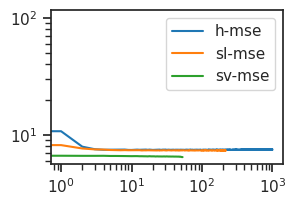

In [15]:
hmse = ((h-tonp(x_vld))**2).sum(-1).sum(-1).mean(0)
slmse = ((sl-tonp(x_vld))**2).sum(-1).sum(-1).mean(0)
svmse = ((sv-tonp(x_vld))**2).sum(-1).sum(-1).mean(0)

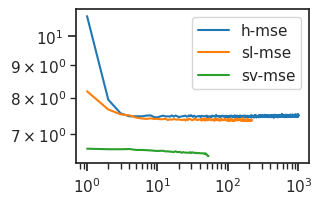

In [27]:
plt.loglog(range(1, 1001), hmse[1:], label="h-mse")
plt.loglog(range(1, 1001), slmse[1:], label="sl-mse")
plt.loglog(range(1, 54), svmse[1:], label="sv-mse")
plt.legend()
plt.show()

In [17]:
hmse

array([101.22117  ,  10.753565 ,   7.939746 , ...,   7.4936156,
         7.4870305,   7.516615 ], dtype=float32)

In [22]:
len(slmse)

1001

In [19]:
svmse

array([6.658154 , 6.644524 , 6.6320524, 6.6313663, 6.637196 , 6.614433 ,
       6.614164 , 6.6086307, 6.6029205, 6.595532 , 6.5893164, 6.594236 ,
       6.5943375, 6.5791016, 6.5814695, 6.5738626, 6.5709906, 6.5619936,
       6.5824447, 6.5647936, 6.5663056, 6.566087 , 6.5465865, 6.56386  ,
       6.552248 , 6.552458 , 6.551132 , 6.5471444, 6.549192 , 6.560302 ,
       6.5400825, 6.5575438, 6.553908 , 6.547408 , 6.5398874, 6.5481377,
       6.5386596, 6.539197 , 6.541829 , 6.542163 , 6.534019 , 6.5353723,
       6.535012 , 6.5367117, 6.5317626, 6.5313444, 6.526201 , 6.536106 ,
       6.51073  , 6.52634  , 6.501823 , 6.49168  , 6.468293 , 6.4715247],
      dtype=float32)

In [20]:
hmse

array([101.22117  ,  10.753565 ,   7.939746 , ...,   7.4936156,
         7.4870305,   7.516615 ], dtype=float32)

In [21]:
slmse

array([99.87574  ,  8.185052 ,  7.6615477, ...,        nan,        nan,
              nan], dtype=float32)

In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('CIFAR10', model_type, 'mlp|mlp')

seq_len = 1
cfg_vae['track_stats'] = True
cfg_vae['seq_len'] = seq_len

cfg_tr['kl_beta'] = 1

vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

tr.n_iters

250000

In [4]:
print(vae.layer.enc)

Sequential(
  (0): Linear(in_features=3072, out_features=2048, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=2048, bias=True)
)

In [5]:
print(vae.layer.dec)

Sequential(
  (0): Linear(in_features=2048, out_features=2048, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

In [8]:
print_num_params(vae.layer)

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  29.4 Mil  |
|     ———      |    ———     |
|     enc      |  14.7 Mil  |
|     dec      |  14.7 Mil  |
+--------------+------------+

In [3]:
%%time

trn, vld, _ = make_dataset('CIFAR10', device, grey=True)
trn, vld, _ = make_dataset('CIFAR10', device, grey=False)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

CPU times: user 1min 9s, sys: 3.76 s, total: 1min 13s
Wall time: 45.6 s


In [7]:
trn.tensors[0].shape

torch.Size([100000, 3, 32, 32])

In [8]:
x2p = tonp(trn.tensors[0])
x2p = (1 + x2p) / 2
x2p = np.clip(x2p, 0, 1)
x2p = x2p.transpose(0, 2, 3, 1)

x2p.shape

(100000, 32, 32, 3)

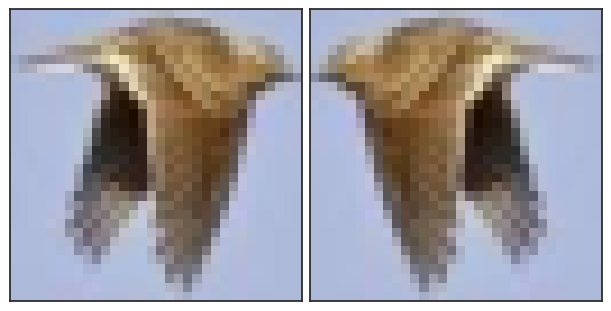

In [21]:
sample_i = 123

fig, axes = create_figure(1, 2, figsize=(6, 3))

axes[0].imshow(x2p[sample_i])
axes[1].imshow(x2p[sample_i + 50000])
remove_ticks(axes, False)
plt.show()

In [18]:
import torchvision
load_dir = add_home('Datasets')

kwargs = dict(grey=False)

transform = [
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Grayscale()
    if kwargs['grey'] else None,
    torchvision.transforms.Normalize(
        mean=(0.5,) if kwargs['grey'] else (0.5,) * 3,
        std=(0.5,) if kwargs['grey'] else (0.5,) * 3),
    # ToDevice(device=device),
]
transform = torchvision.transforms.Compose([
	t for t in transform if t is not None
])

In [19]:
kws = dict(
    root=pjoin(load_dir, 'CIFAR10'),
    transform=transform,
)
trn = torchvision.datasets.CIFAR10(train=True, **kws)

In [20]:
trn

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /home/hadi/Datasets/CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [21]:
loader = torch.utils.data.DataLoader(
    trn, batch_size=len(trn))

trn = next(iter(loader))

In [25]:
trn[0].shape, trn[1]

(torch.Size([50000, 3, 32, 32]), tensor([6, 9, 9,  ..., 9, 1, 1]))

In [3]:
from base.dataset import make_dataloader

dl_vld = make_dataloader('ImageNet32', device, skip_trn=True)[1]

In [4]:
%%time

process_imagenet()

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/ImageNet32/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/ImageNet32/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/ImageNet32/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/ImageNet32/processed

CPU times: user 16.3 s, sys: 32.4 s, total: 48.7 s
Wall time: 48.7 s


In [4]:
path = '/home/hadi/Datasets/ImageNet32'
sorted(os.listdir(path))

['Imagenet32_train.zip',
 'Imagenet32_val.zip',
 'processed',
 'train_data_batch_1',
 'train_data_batch_10',
 'train_data_batch_2',
 'train_data_batch_3',
 'train_data_batch_4',
 'train_data_batch_5',
 'train_data_batch_6',
 'train_data_batch_7',
 'train_data_batch_8',
 'train_data_batch_9',
 'val_data']

In [7]:
data = unpickle(pjoin(path, 'val_data'))
list(data)

['labels', 'data']

In [10]:
x = data['data'].reshape(-1, 3, 32, 32)
x.shape

(50000, 3, 32, 32)

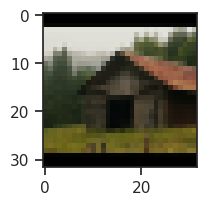

In [18]:
plt.imshow(x[180].transpose(1, 2, 0))

In [59]:
path = add_home('Datasets/ImageNet32')
files = sort_batches(os.listdir(path))

trn_files = [f for f in files if 'train_data' in f]
val_files = [f for f in files if 'val_data' in f]

trn_files, val_files

(['train_data_batch_1',
  'train_data_batch_2',
  'train_data_batch_3',
  'train_data_batch_4',
  'train_data_batch_5',
  'train_data_batch_6',
  'train_data_batch_7',
  'train_data_batch_8',
  'train_data_batch_9',
  'train_data_batch_10'],
 ['val_data'])

In [60]:
for f in trn_files:
    data_dict = unpickle(pjoin(path, f))
    print(f, {k: np.asarray(v).shape for k, v in data_dict.items()})

train_data_batch_1
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_2
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_3
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_4
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_5
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_6
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_7
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_8
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_9
{'labels': (128116,), 'data': (128116, 3072), 'mean': (3072,)}

train_data_batch_10
{'labels': (128123,), 'data': (128123, 3072), 'mean': (3072,)}

In [92]:
x_trn, y_trn = load_cat(trn_files)
x_vld, y_vld = load_cat(val_files)

# reshape, shift, rescale
x_trn = _transform(x_trn)
x_vld = _transform(x_vld)

# shift: 0, ..., 999
y_trn -= 1
y_vld -= 1

x_trn.shape, x_vld.shape

((1281167, 3, 32, 32), (50000, 3, 32, 32))

<Axes: ylabel='Count'>

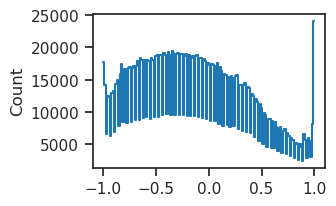

In [93]:
histplot(x_vld[:600].ravel())

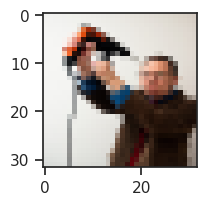

In [102]:
x2p = x_vld[200]
x2p = (1 + x2p) / 2
x2p = np.clip(x2p, 0, 1)
x2p = x2p.transpose(1, 2, 0)

plt.imshow(x2p)
plt.show()

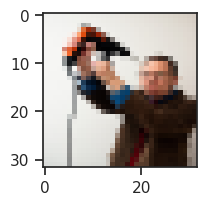

In [106]:
plt.imshow(unpickle(pjoin(path, 'val_data'))['data'][200].reshape(3, 32, 32).transpose(1, 2, 0))

In [3]:
from base.distributions import Normal

In [4]:
dist = Normal(torch.randn(123, 128), torch.randn(123, 128))

In [8]:
z = dist.sample()

In [11]:
dist.log_prob(z)

tensor([[-2.9170, -1.0197, -2.3397,  ..., -1.4768, -1.3463, -2.3250],
        [-3.5510, -1.8649, -0.1023,  ..., -2.5057, -1.6227, -1.6194],
        [-0.0658, -2.6664, -2.1462,  ..., -1.8712, -2.5295, -0.3952],
        ...,
        [-2.8009,  0.1837, -1.7608,  ..., -0.9280, -0.2967, -3.0460],
        [-1.3645, -4.0890, -0.9005,  ..., -3.3610, -1.5527, -0.5601],
        [-0.4687, -1.9157, -1.1375,  ..., -0.9175, -0.9015, -2.6066]])

In [ ]:
transform = [
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(
        mean=(0.5,) * 3,
        std=(0.5,) * 3),
]

In [3]:
from vae.layers import _build_mlp

In [16]:
dec_1 = _build_mlp(1024, 3 * 32**2, activation_fn='silu')
dec_2 = _build_mlp(1200, 3 * 32**2, activation_fn='silu')
dec_3 = _build_mlp(2048, 3 * 32**2, activation_fn='silu')

print_num_params(dec_1)
print(dec_1)
print('-' * 110)
print('\n')

print_num_params(dec_2)
print(dec_2)
print('-' * 110)
print('\n')

print_num_params(dec_3)
print(dec_3)
print('-' * 110)
print('\n')

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  Sequential |  5.2 Mil   |
|     ———     |    ———     |
|      0      |  1.1 Mil   |
|      2      |  1.1 Mil   |
|      4      |  3.1 Mil   |
+-------------+------------+

Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=1024, out_features=3072, bias=True)
)

--------------------------------------------------------------------------------------------------------------

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  Sequential |  12.9 Mil  |
|     ———     |    ———     |
|      0      |  2.5 Mil   |
|      2      |  4.2 Mil   |
|      4      |  6.3 Mil   |
+-------------+------------+

Sequential(
  (0): Linear(in_features=1200, out_features=2048, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

--------------------------------------------------------------------------------------------------------------

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|  Sequential |  14.7 Mil  |
|     ———     |    ———     |
|      0      |  4.2 Mil   |
|      2      |  4.2 Mil   |
|      4      |  6.3 Mil   |
+-------------+------------+

Sequential(
  (0): Linear(in_features=2048, out_features=2048, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=2048, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

--------------------------------------------------------------------------------------------------------------

In [8]:
print(_build_mlp(128, 28**2, activation_fn='silu'))

Sequential(
  (0): Linear(in_features=128, out_features=234, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=234, out_features=428, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=428, out_features=784, bias=True)
)

In [6]:
print(_build_mlp(128, 3 * 32**2, activation_fn='silu'))

Sequential(
  (0): Linear(in_features=128, out_features=512, bias=True)
  (1): SiLU(inplace=True)
  (2): Linear(in_features=512, out_features=2048, bias=True)
  (3): SiLU(inplace=True)
  (4): Linear(in_features=2048, out_features=3072, bias=True)
)

In [13]:
trn, vld, _ = make_dataset('CIFAR10', device=device)

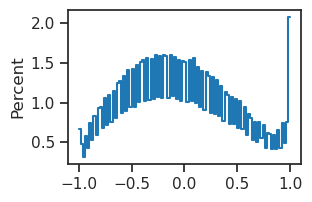

In [37]:
data = vld.tensors[0]
x2p = tonp(data[:400].ravel())
histplot(x2p, bins=np.linspace(-1, 1, 101), stat='percent');

In [27]:
mse = nn.MSELoss(reduction='none')

In [30]:
torch.sum(mse(data[0], data[1]))

tensor(2172.9639, device='cuda:1')

In [40]:
torch.sum(mse(data[0] * 10, data[1] * 10))

tensor(217296.3906, device='cuda:1')

<Axes: ylabel='Percent'>

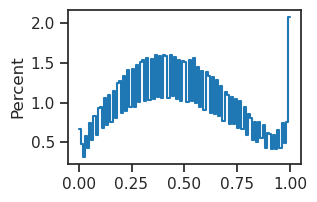

In [38]:
x2p_shifted = (1 + x2p) / 2
histplot(x2p_shifted, bins=np.linspace(0, 1, 101), stat='percent')

## Fit Amortized Gaussian quick

```<fit>```

In [3]:
model_type = 'gaussian'
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'mlp|mlp')

seq_len = 1
cfg_vae['seq_len'] = seq_len
cfg_tr['batch_size'] = 1000

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

tr.n_iters

24000

In [5]:
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")

gaussian_MNIST_t-1_z-[128]_<mlp|mlp>
b1000-ep400-lr(0.002)_beta(1:0x0.1)_gr(50)_(2024_09_17,23:37)

In [10]:
tr.train()

epoch # 400, avg loss: 26.061427: 100%|███████| 400/400 [05:35<00:00,  1.19it/s]


```</fit>```

In [23]:
import torchvision

torchvision.datasets.SVHN(root=add_home('Datasets/SVHN'), split='train', download=True)

Using downloaded and verified file: /home/hadi/Datasets/SVHN/train_32x32.mat


Dataset SVHN
    Number of datapoints: 73257
    Root location: /home/hadi/Datasets/SVHN
    Split: train

In [11]:
vld = torchvision.datasets.SVHN(root=add_home('Datasets/SVHN'), split='test', download=True)

Using downloaded and verified file: /home/hadi/Datasets/SVHN/test_32x32.mat


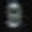

In [29]:
vld[40][0]

In [37]:
load_dir = add_home('Datasets')

kwargs = {}
defaults = dict(grey=True)
kwargs = setup_kwargs(defaults, kwargs)


transform = [
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Grayscale()
    if kwargs['grey'] else None,
    torchvision.transforms.Normalize(
        mean=(0.5,) * 3, std=(0.5,) * 3)
    if not kwargs['grey'] else None,
    # ToDevice(device=device),
]
transform = torchvision.transforms.Compose([
    t for t in transform if t is not None
])

# transform = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
# ])
# make dataset
kws = dict(root=pjoin(load_dir, 'SVHN'), transform=transform)
trn = torchvision.datasets.SVHN(split='train', **kws)
vld = torchvision.datasets.SVHN(split='test', **kws)

In [38]:
x = tonp(vld[6][0])

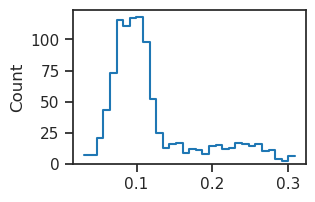

In [39]:
histplot(x.ravel());

In [40]:
x.shape

(1, 32, 32)

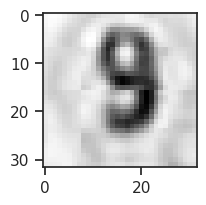

In [41]:
plt.imshow(x.squeeze(), cmap='Greys');

In [51]:
x.shape

(3, 32, 32)

In [3]:
%%time

trn, vld, _ = make_dataset('SVHN', device=device, grey=True)
trn, vld, _ = make_dataset('SVHN', device=device, grey=False)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed_grey

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/SVHN/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/SVHN/processed

CPU times: user 1min 1s, sys: 1.16 s, total: 1min 2s
Wall time: 1min 2s


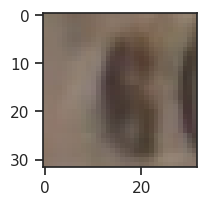

In [15]:
x2p = tonp(trn.tensors[0][51])
x2p = x2p.transpose(1, 2, 0)
x2p = (1 + x2p) / 2

plt.imshow(x2p)
plt.show()

In [16]:
trn, vld, _ = make_dataset('SVHN', 'Datasets', device=device, grey=True)

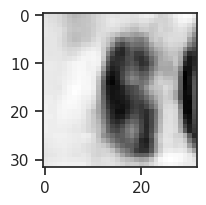

In [21]:
x2p = tonp(trn.tensors[0][51].squeeze())
plt.imshow(x2p, cmap='Greys_r')
plt.show()

In [4]:
trn, vld, _ = make_dataset('Omniglot', 'Datasets', device=device)

In [8]:
trn.tensors[0].shape, vld.tensors[0].shape

(torch.Size([19280, 1, 28, 28]), torch.Size([13180, 1, 28, 28]))

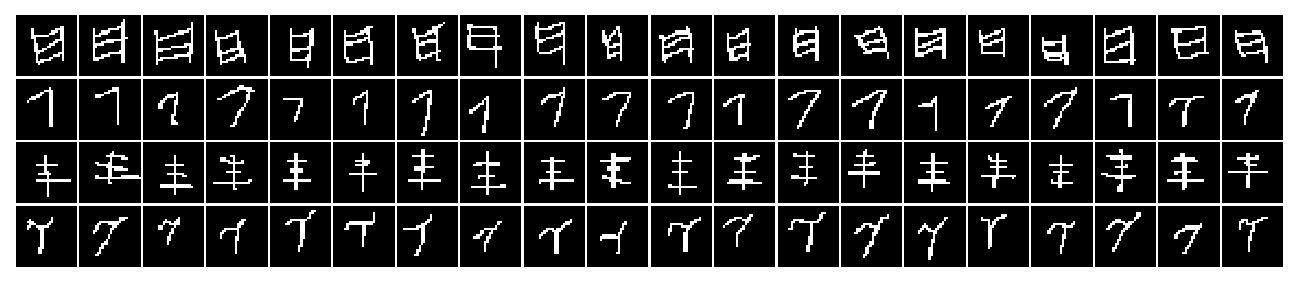

In [11]:
_ = plot_weights(trn.tensors[0][:80], nrows=4)

In [4]:
from base.dataset import torchvision, ToDevice, _process, InvertBinaryPILImage
load_dir = add_home('Datasets')

In [5]:
kws_resize = dict(
    size=28,
    antialias=True,
    interpolation=torchvision.transforms.functional.InterpolationMode.NEAREST,
)
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(**kws_resize),
    InvertBinaryPILImage(),
    torchvision.transforms.ToTensor(),
    ToDevice(device=device),
])
kws = dict(root=load_dir, transform=transform, download=False)

In [6]:
ds = torchvision.datasets.Omniglot(background=False, **kws)

In [7]:
ds[5][0].shape

torch.Size([1, 28, 28])

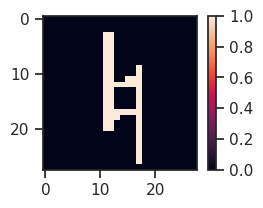

In [8]:
x2p = tonp(ds[5][0].squeeze())
plt.imshow(x2p)
plt.colorbar()

<Axes: ylabel='Count'>

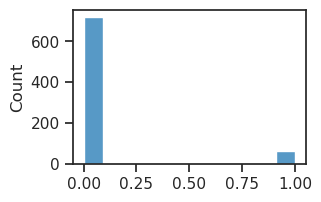

In [41]:
sns.histplot(x2p.ravel())

In [ ]:

for split in ['byclass', 'bymerge', 'balanced', 'letters', 'digits', 'mnist']:
    trn = torchvision.datasets.EMNIST(split=split, train=True, **kws)
    vld = torchvision.datasets.EMNIST(split=split, train=False, **kws)
torchvision.datasets.Omniglot()

In [3]:
%%time

trn, vld, _ = make_dataset('EMNIST', 'Datasets', device=device)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/EMNIST/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/EMNIST/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/EMNIST/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/EMNIST/processed

CPU times: user 30.7 s, sys: 747 ms, total: 31.4 s
Wall time: 25.3 s


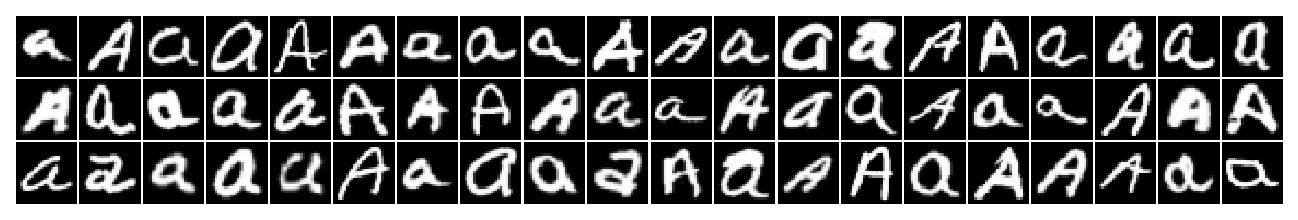

In [6]:
_ = plot_weights(vld.tensors[0][:60], nrows=3)

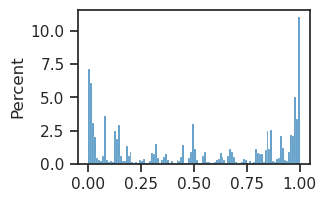

In [11]:
x2p = tonp(vld.tensors[0].ravel())
x2p = x2p[x2p > 0.001]
sns.histplot(x2p, stat='percent');

In [10]:
torch.unique(vld.tensors[1])

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26])

In [28]:
dec = _build_mlp(128, 784, 'relu', 2)
print(dec)

Sequential(
  (0): Linear(in_features=128, out_features=234, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=234, out_features=428, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=428, out_features=784, bias=True)
)

In [29]:
dec = _build_mlp(128, 784, 'relu', 2, True)
print(dec)

Sequential(
  (0): Linear(in_features=128, out_features=234, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=234, out_features=428, bias=True)
  (3): ReLU(inplace=True)
  (4): Linear(in_features=428, out_features=784, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=784, out_features=784, bias=True)
)

In [8]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

cfg_vae['track_stats'] = True

cfg_tr['epochs'] = 300
cfg_tr['batch_size'] = 250
cfg_tr['kl_beta'] = 4.0
cfg_tr['kl_anneal_portion'] = 0.1

vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [9]:
tr.n_iters

123600

In [10]:
vars(tr.cfg)

{'lr': 0.002,
 'epochs': 300,
 'batch_size': 250,
 'file_name': None,
 'warm_restart': 0,
 'warmup_epochs': 5,
 'optimizer': 'adamax_fast',
 'optimizer_kws': {'weight_decay': 0.0, 'betas': (0.9, 0.999), 'eps': 1e-08},
 'scheduler_type': 'cosine',
 'scheduler_kws': {'T_max': 295.0, 'eta_min': 1e-05},
 'ema_rate': None,
 'grad_clip': 500,
 'chkpt_freq': 50,
 'eval_freq': 20,
 'log_freq': 10,
 'use_amp': False,
 'method': 'mc',
 'kl_beta': 4.0,
 'kl_beta_min': 0.0001,
 'kl_balancer': None,
 'kl_time_adjuster': None,
 'kl_anneal_cycles': 0,
 'kl_anneal_portion': 0.1,
 'kl_const_portion': 0.001,
 'lambda_anneal': False,
 'lambda_init': 0.0,
 'lambda_norm': 0.0,
 'temp_anneal_portion': 0.5,
 'temp_anneal_type': 'lin',
 'temp_start': 1.0,
 'temp_stop': 0.05}

In [11]:
tr.train()

epoch # 300, avg loss: 92.988861: 100%|█████| 300/300 [1:24:08<00:00, 16.83s/it]


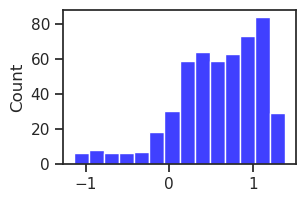

In [14]:
log_rate = tonp(tr.model.layer.log_rate).ravel()
sns.histplot(log_rate, color='b');

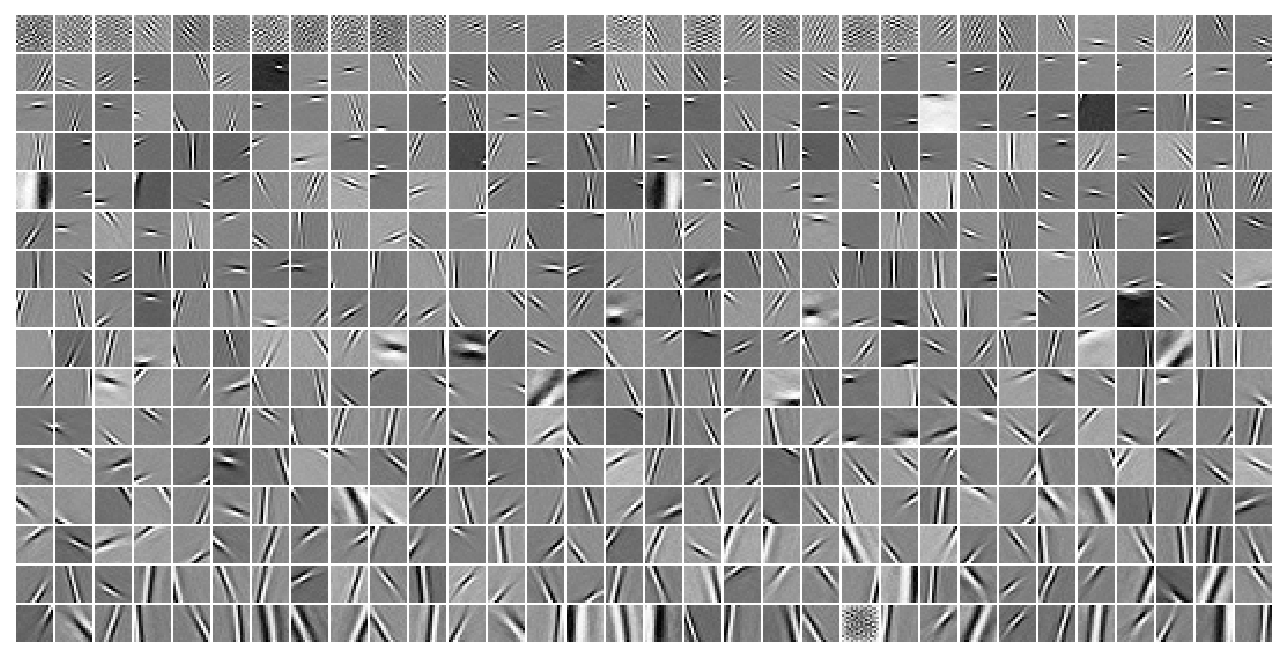

In [15]:
tr.model.show(order=np.argsort(log_rate));

In [16]:
%%time

kws = dict(
    seq_total=1000,
    seq_batch_sz=1000,
    n_data_batches=None,
    # active=~dead,
)
results = tr.analysis(**kws)

100%|███████████████████████████████| 104/104 [07:35<00:00,  4.38s/it]


CPU times: user 7min 23s, sys: 25.6 s, total: 7min 49s
Wall time: 7min 49s


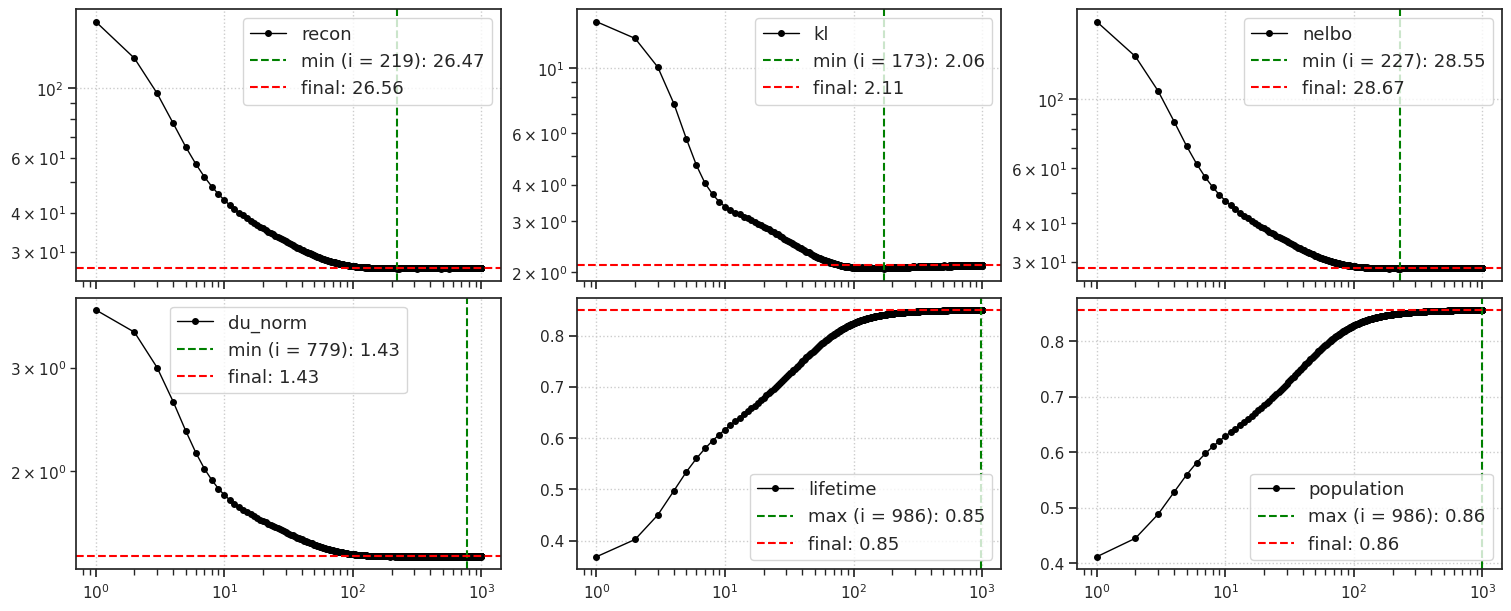

In [19]:
from figures.analysis import plot_convergence

plot_convergence(results, color='k');

In [3]:
model_name = 'poisson_uniform_c(-2)_MNIST_t-10_z-[128]_<jacob|mlp+b>'
gold_standard = 'warm1_clamp-u:(8.0)-du:(10.0)_b200-ep500-lr(0.002)_beta(5:0x0.3)_temp(0.05:lin-0.5)_gr(100)_(2024_09_11,12:29)'
tr, meta = load_model(model_name=model_name, fit_name=gold_standard, device=device, checkpoint=-1)
meta['checkpoint']

500

In [7]:
from vae.train_vae import _prep
self = tr
kwargs = {'full_data': True}
temp = model2temp(self.model.cfg.type)
kwargs = setup_kwargs({'temp': temp}, kwargs)
data, loss, etc = self.forward('vld', **kwargs)

In [8]:
list(loss)

['kl', 'kl_diag', 'recon', 'nelbo']

In [12]:
loss_perdim = {
    'kl_perdim': _prep(loss['kl'], sum(self.model.cfg.n_latents)),
    'recon_perdim': _prep(loss['recon'], np.prod(self.model.cfg.input_sz)),
}
loss_perdim['nelbo_perdim'] = {
    k: recon + loss_perdim['kl_perdim'][k] for
    k, recon in loss_perdim['recon_perdim'].items(),
}
# loss_perdim['nelbo_perdim'] = loss_perdim['kl_perdim'] + loss_perdim['recon_perdim']

In [13]:
loss_perdim

{'kl_perdim': {'0': 0.04536516219377518,
  '1': 0.04201909899711609,
  '2': 0.025120383128523827,
  '3': 0.013111178763210773,
  '4': 0.00826082844287157,
  '5': 0.006098019424825907,
  '6': 0.00485973572358489,
  '7': 0.0040818313136696815,
  '8': 0.0036526790354400873,
  '9': 0.0033205661457031965,
  'avg': 0.01558894831687212},
 'recon_perdim': {'0': 0.05425256125781001,
  '1': 0.03282374751811125,
  '2': 0.022854364648157238,
  '3': 0.0184161833354405,
  '4': 0.016011866987967978,
  '5': 0.014510059843257981,
  '6': 0.013528305657055914,
  '7': 0.012864774587203046,
  '8': 0.012386463126357721,
  '9': 0.011990906024465755,
  'avg': 0.020963923298582737},
 'nelbo_perdim': {'0': 0.09961772345158518,
  '1': 0.07484284651522734,
  '2': 0.047974747776681065,
  '3': 0.03152736209865127,
  '4': 0.02427269543083955,
  '5': 0.02060807926808389,
  '6': 0.018388041380640804,
  '7': 0.016946605900872727,
  '8': 0.01603914216179781,
  '9': 0.015311472170168951,
  'avg': 0.036552871615454854}}

In [18]:
loss_avg = {
    k: _prep(v) for k, v in
    loss.items() if k != 'kl_diag'
}

In [19]:
list(loss_avg)

['kl', 'recon', 'nelbo']

In [20]:
loss_avg['kl']

{'0': 5.8122654,
 '1': 5.358565,
 '2': 3.199888,
 '3': 1.6933955,
 '4': 1.061279,
 '5': 0.78092617,
 '6': 0.62447363,
 '7': 0.5291324,
 '8': 0.46189117,
 '9': 0.41911054,
 'avg': 1.9940926730632782}

In [21]:
loss_avg['recon']

{'0': 42.396095,
 '1': 25.748032,
 '2': 17.876572,
 '3': 14.424323,
 '4': 12.571443,
 '5': 11.395431,
 '6': 10.612431,
 '7': 10.097219,
 '8': 9.694196,
 '9': 9.405854,
 'avg': 16.422159481048585}

In [ ]:
self.model.

In [3]:
from base.distributions import Poisson

In [4]:
dist = Poisson(log_rate=torch.randn(1000, 512) * 0.6, temp=0.1)

In [5]:
%timeit dist.rsample()

52.2 ms ± 978 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
dist.rate.max()

tensor(14.5779)

In [17]:
max_rate = dist.rate.max().item()
pois = sp_stats.poisson(max_rate)
n_exp = pois.ppf(1.0 - 1e-6)

In [18]:
n_exp

39.0

In [7]:
%timeit Poisson(log_rate=torch.randn(1000, 512) * 0.6, temp=0.1)

4.92 ms ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

cfg_vae['init_scale'] = 1e-2
cfg_vae['seq_len'] = 8

cfg_tr['lr'] = 2e-3
cfg_tr['epochs'] = 600
cfg_tr['batch_size'] = 500
cfg_tr['kl_beta'] = 8.0

cfg_tr['kl_balancer'] = None
cfg_tr['kl_time_adjuster'] = None

In [6]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [15]:
alphas = F.softplus(vae.base_alphas)
alphas

tensor([[0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931, 0.6931]],
       device='cuda:0', grad_fn=<SoftplusBackward0>)

In [13]:
F.normalize(alphas, p=1.0).mul(vae.cfg.seq_len)

tensor([[1., 1., 1., 1., 1., 1., 1., 1.]], device='cuda:0',
       grad_fn=<MulBackward0>)

100%|███████████████████████| 561753746/561753746 [00:29<00:00, 18945505.26it/s]


Extracting /home/hadi/Datasets/EMNIST/raw/gzip.zip to /home/hadi/Datasets/EMNIST/raw
CPU times: user 25.6 s, sys: 3.85 s, total: 29.5 s
Wall time: 38.5 s


In [71]:
split = 'letters'
vld = torchvision.datasets.EMNIST(split=split, train=False, **kws)
vld = _process(vld)

In [74]:
.shape

(80, 1, 28, 28)

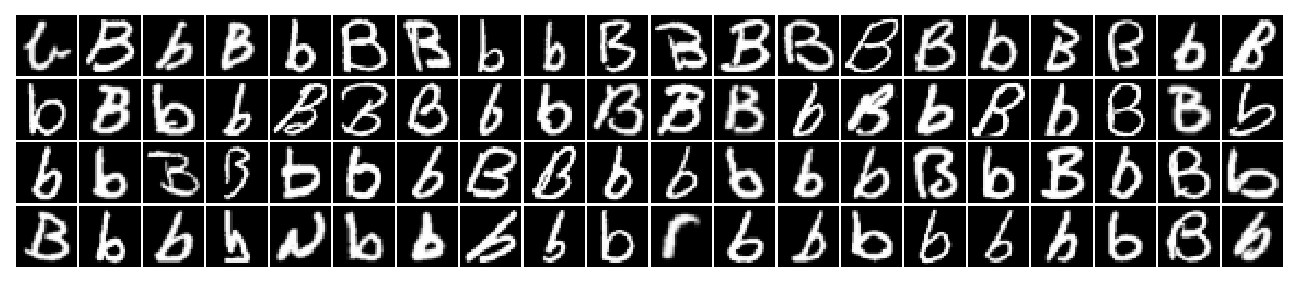

In [77]:
_ = plot_weights(tonp(vld[0][1000:1080]).transpose(0, 1, 3, 2), nrows=4)

In [78]:
vld[1][1000:1080]

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.transpose()

In [3]:
%%time

trn, vld, tst = make_dataset('CIFAR10', 'Datasets', device=device, grey=True)
trn, vld, tst = make_dataset('CIFAR10', 'Datasets', device=device, grey=False)

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed_grey

[PROGRESS] 'x_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'x_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'y_trn.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

[PROGRESS] 'y_vld.npy' saved at
/home/hadi/Datasets/CIFAR10/processed

CPU times: user 1min 12s, sys: 1.65 s, total: 1min 14s
Wall time: 1min 14s


In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'jacob|lin')

cfg_vae['init_scale'] = 1e-2
cfg_vae['seq_len'] = 8

cfg_tr['lr'] = 2e-3
cfg_tr['epochs'] = 600
cfg_tr['batch_size'] = 500
cfg_tr['kl_beta'] = 8.0

cfg_tr['kl_time_adjuster'] = 'log'

In [4]:
vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [5]:
kl_batch = torch.sum(kl, dim=2)
kl_batch.shape

torch.Size([500, 10])

torch.Size([10])

In [12]:
kl_batch.mul_(tr.alphas_time.unsqueeze(0))

tensor([[2.9488e-01, 3.5559e+00, 1.4340e+01,  ..., 6.9668e+01, 7.7290e+01,
         1.3579e+02],
        [3.0527e-01, 3.3412e+00, 1.2325e+01,  ..., 8.6450e+01, 6.8390e+01,
         1.0793e+02],
        [3.3421e-01, 5.2285e+00, 1.3307e+01,  ..., 9.0537e+01, 1.2135e+02,
         9.4812e+01],
        ...,
        [2.1673e-01, 1.9556e+00, 1.1784e+01,  ..., 3.6917e+01, 4.4717e+01,
         4.4402e+01],
        [2.7495e-01, 2.5324e+00, 6.3079e+00,  ..., 5.4701e+01, 1.0189e+02,
         1.8120e+02],
        [1.5860e-01, 1.1411e+00, 5.1360e+00,  ..., 3.8511e+01, 2.7253e+01,
         5.9001e+01]], device='cuda:0', grad_fn=<MulBackward0>)

In [6]:
kl_balanced, gamma = kl_balancer(
    kl_batch=kl_batch,
    alpha=self.alphas,
    balance=True,
)
kl_balanced.shape

torch.Size([500])

In [3]:
from vae.config_vae import _KL_ADJUSTER_CHOICES
_KL_ADJUSTER_CHOICES

[None, 'equal', 'linear', 'sqrt', 'log']

equal:
tensor([1., 1., 1., 1., 1., 1., 1., 1.])
mean = 1.0

linear:
tensor([0.2222, 0.4444, 0.6667, 0.8889, 1.1111, 1.3333, 1.5556, 1.7778])
mean = 1.0

sqrt:
tensor([0.4906, 0.6938, 0.8498, 0.9812, 1.0971, 1.2018, 1.2981, 1.3877])
mean = 1.0

log:
tensor([0.4300, 0.7281, 0.9024, 1.0261, 1.1221, 1.2005, 1.2667, 1.3242])
mean = 1.0

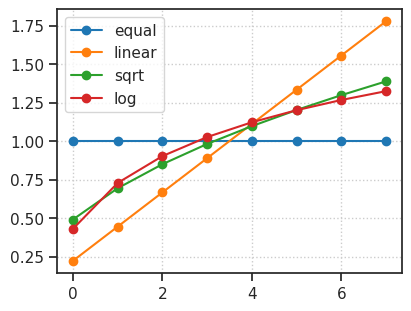

In [4]:
fig, ax = create_figure(1, 1, (4, 3))
for fun in _KL_ADJUSTER_CHOICES[1:]:
    alphas = kl_balancer_coeff(t=8, fun=fun, flip=False, normalize=True)
    print(f"{fun}:\n{alphas}\nmean = {alphas.mean()}\n")
    ax.plot(alphas, marker='o', label=fun)
ax.legend()
ax.grid()
plt.show()

In [3]:
for fun in ['equal', 'linear', 'sqrt', 'square', 'exp', 'log']:
    alphas = kl_balancer_coeff(t=10, fun=fun, flip=False)
    print(f"{fun}:\n{alphas}\nmean = {alphas.mean()}\n")

equal:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
mean = 1.0

linear:
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
mean = 5.5

sqrt:
tensor([1.0000, 1.4142, 1.7321, 2.0000, 2.2361, 2.4495, 2.6458, 2.8284, 3.0000,
        3.1623])
mean = 2.2468278408050537

square:
tensor([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])
mean = 38.5

exp:
tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
mean = 1281.830810546875

log:
tensor([1.0000, 1.6931, 2.0986, 2.3863, 2.6094, 2.7918, 2.9459, 3.0794, 3.1972,
        3.3026])
mean = 2.5104410648345947

In [4]:
for fun in ['equal', 'linear', 'sqrt', 'square', 'exp', 'log']:
    alphas = kl_balancer_coeff(t=10, fun=fun, flip=False, normalize=True)
    print(f"{fun}:\n{alphas}\nmean = {alphas.mean()}\n")

equal:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
mean = 1.0

linear:
tensor([0.1818, 0.3636, 0.5455, 0.7273, 0.9091, 1.0909, 1.2727, 1.4545, 1.6364,
        1.8182])
mean = 1.0

sqrt:
tensor([0.4451, 0.6294, 0.7709, 0.8901, 0.9952, 1.0902, 1.1775, 1.2589, 1.3352,
        1.4074])
mean = 1.0

square:
tensor([0.0260, 0.1039, 0.2338, 0.4156, 0.6494, 0.9351, 1.2727, 1.6623, 2.1039,
        2.5974])
mean = 0.9999998807907104

exp:
tensor([7.8013e-04, 2.1206e-03, 5.7645e-03, 1.5669e-02, 4.2594e-02, 1.1578e-01,
        3.1473e-01, 8.5552e-01, 2.3255e+00, 6.3215e+00])
mean = 1.0

log:
tensor([0.3983, 0.6744, 0.8360, 0.9505, 1.0394, 1.1121, 1.1735, 1.2267, 1.2736,
        1.3155])
mean = 1.0